# 數學與圖像說明
以下程式維手刻出此Neural Network，在此以iris為範例，希望以iris的Sepal.Width變數以類神經做linear logistic regerssion分出是否為setosa品種

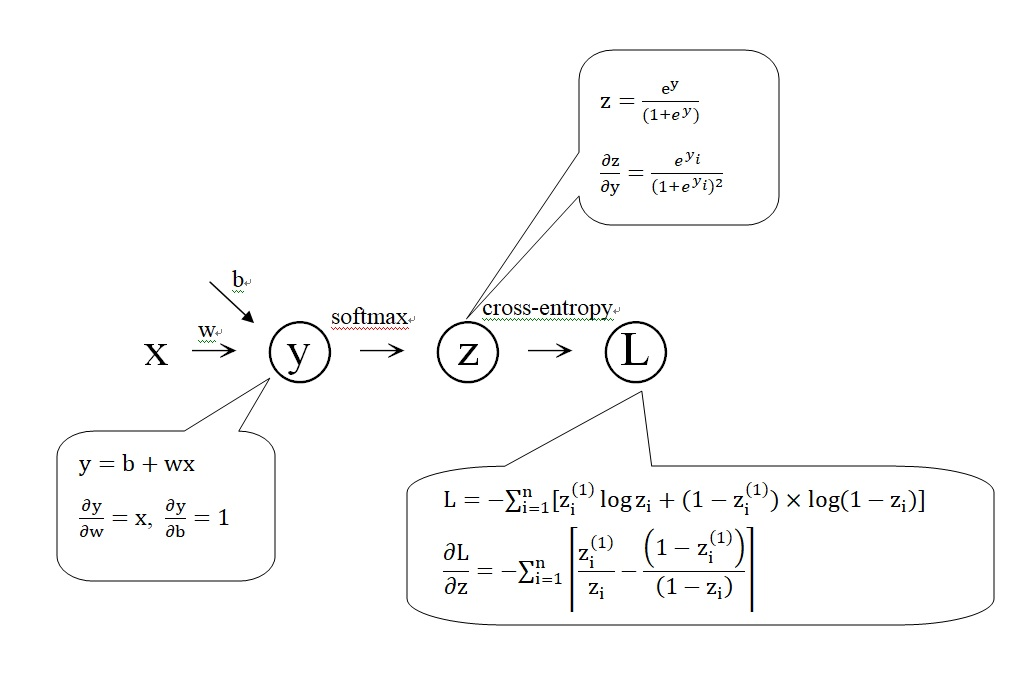

In [1]:
from IPython.display import Image
Image(filename='C:/Folder/Institute/論文/Picture/自動微分推導1.jpg')

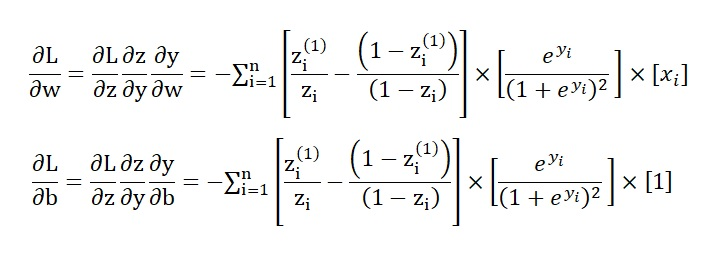

In [2]:
Image(filename='C:/Folder/Institute/論文/Picture/自動微分推導2.jpg') 

In [165]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
iris = datasets.load_iris()

In [3]:
inputiris = iris['data'].T[1]

建立類神經元

In [4]:
x = inputiris
y = iris['target'] == 0

In [89]:
class Loss_vaule():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def Layer(self, x, par):
        x1 = np.array([np.ones(self.x.size), self.x]) # 1, x
        x2 = np.dot(par, x1) # [b, w][1, x]T
        return x2
    
    def softmax(self, y):
        return(np.exp(y) / (np.exp(y) + 1))
    
    def output(self, par):
        self.x2 = self.Layer(inputiris, par)
        self.y_hat = self.softmax(self.x2)
    
    def crossentropy(self, par, y_hat=None, x2=None):
        if y_hat is None:
#             pred, y = self.output(par)
            self.output(par)
        else:
            self.x2 = x2
            self.y_hat = y_hat
        z = sum(self.y * np.log(self.y_hat) + (1 - self.y) * np.log(1 - self.y_hat))
        z = -np.nan_to_num(z, 5000, -5000)
        self.loss_value = z

In [90]:
iris_p = Loss_vaule(x, y)
iris_p.crossentropy([1, 1])
iris_p.loss_value

390.0083060425357

## 畫Loss function(X=weight, y=base, z=loss)

In [47]:
X = np.linspace(-20, 20, 200)
Y = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(X, Y)
draw = np.array([X,Y]).T.reshape(-1,2)
Z = np.array([iris_p.crossentropy(ele) for ele in draw]).reshape(200,-1)

C:\Users\burt\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
C:\Users\burt\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


In [9]:
np.max(Z)

5000.0

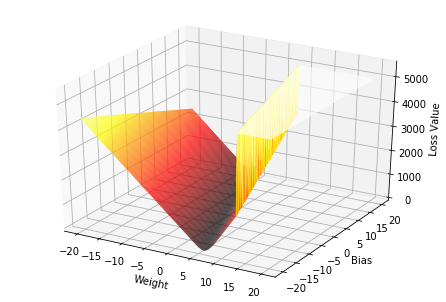

In [140]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('hot'))

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Loss Value")
ax.set_zlim(0, 5500)
plt.show()

#### 蒙地卡羅算出參數估計使loss value最小值

In [13]:
min_ind = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
print("參數最小值 b = {}, w = {}, loss value = {}".format(
    round(Y[min_ind], 4), round(X[min_ind], 4), round(Z[min_ind], 4)))

參數最小值 b = -16.1809, w = 4.9246, loss value = 61.9387


## Gredient Descent

In [99]:
class Simple_NN(Loss_vaule):
    def __init__(self, x, y, pars=[5, 5]):
        super().__init__(x, y)
        self.pars = pars
        
    def gredient_descent(self):
#         self.output(self.pars)
        
        a1 = (self.y / self.y_hat) - ((1 - self.y) / (1 - self.y_hat))
        a2 = np.exp(self.x2) / (1 + np.exp(self.x2))**2
        par1 = -sum(a1 * a2)
        par2 = -sum(a1 * a2 * inputiris)
        return([par1, par2])
    
    def train(self, lr=0.001, epoch=10000, verbose=True):
        self.par_log = []
        if verbose:
            tmp = range(1, epoch)
        else:
            tmp = tqdm(range(1, epoch))
        for i in tmp:
            self.par_log.append(self.pars)
            self.output(self.pars)
            gradient = self.gredient_descent()
            new_par = np.array(self.pars) + -lr * np.array(gradient)
            self.pars = new_par
            self.crossentropy(self.pars, self.y_hat, self.y)
            if verbose:
                print("------------ [{}] ------------".format(i))
                print("Gradient (b, w): ", gradient)
                print("New par (b, w): ", new_par)
                print("Loss Value: ", self.loss_value)

In [188]:
def metrics(simple_model, name="Model"):
    print(" << {} >> ".format(name))
    print("---------- Info ----------")
    print("pars = {}, loss = {}.\n".format(simple_model.pars, simple_model.loss_value))
    print("----- Confusion Matrix -----")
    print(confusion_matrix(simple_model.y, simple_model.y_hat > .5))
    print("\n---------- Report ----------")
    print(classification_report(simple_model.y, simple_model.y_hat > .5))

#### Model 1: epochs = 10000, lr = 0.007

In [152]:
%%time
iris_model = Simple_NN(x, y)
iris_model.train(lr=0.007)

------------ [1] ------------
Gradient (b, w):  [99.99999869623224, 287.19999680797457]
New par (b, w):  [4.30000001 2.98960002]
Loss Value:  1936.0000018933074
------------ [2] ------------
Gradient (b, w):  [99.999538876221, 287.1988078176399]
New par (b, w):  [3.60000324 0.97920837]
Loss Value:  1288.6135884559142
------------ [3] ------------
Gradient (b, w):  [99.77646655851981, 286.5553005810025]
New par (b, w):  [ 2.90156797 -1.02667874]
Loss Value:  641.4526959773136
------------ [4] ------------
Gradient (b, w):  [16.607366831383214, 25.454231239794076]
New par (b, w):  [ 2.7853164  -1.20485836]
Loss Value:  121.69290776729181
------------ [5] ------------
Gradient (b, w):  [-4.926007852102095, -40.18314701862925]
New par (b, w):  [ 2.81979846 -0.92357633]
Loss Value:  122.56221214806887
------------ [6] ------------
Gradient (b, w):  [24.915572971509427, 51.365160602755864]
New par (b, w):  [ 2.64538945 -1.28313245]
Loss Value:  123.94904547493256
------------ [7] -----------

Gradient (b, w):  [49.034571980726994, 135.94676440369392]
New par (b, w):  [-1.94824172 -0.20378395]
Loss Value:  117.42076596096229
------------ [119] ------------
Gradient (b, w):  [-39.315435899852964, -139.11064506616833]
New par (b, w):  [-1.67303367  0.76999057]
Loss Value:  143.42776336746175
------------ [120] ------------
Gradient (b, w):  [48.990483796953285, 135.9407868089276]
New par (b, w):  [-2.01596706 -0.18159494]
Loss Value:  117.09701998328212
------------ [121] ------------
Gradient (b, w):  [-39.321098874657835, -139.0872200729298]
New par (b, w):  [-1.74071936  0.7920156 ]
Loss Value:  143.00413880389397
------------ [122] ------------
Gradient (b, w):  [48.94493189086293, 135.92919893007317]
New par (b, w):  [-2.08333389 -0.15948879]
Loss Value:  116.7765801891761
------------ [123] ------------
Gradient (b, w):  [-39.324922539169414, -139.05829447221944]
New par (b, w):  [-1.80805943  0.81391927]
Loss Value:  142.5788423325825
------------ [124] ------------
Gra

------------ [235] ------------
Gradient (b, w):  [-36.98619829904323, -129.38701105618418]
New par (b, w):  [-5.08672938  1.86071757]
Loss Value:  117.32206106659369
------------ [236] ------------
Gradient (b, w):  [44.110478920543294, 126.84204293473486]
New par (b, w):  [-5.39550274  0.97282327]
Loss Value:  101.61625513438868
------------ [237] ------------
Gradient (b, w):  [-36.90061444359089, -129.06997415934526]
New par (b, w):  [-5.13719843  1.87631309]
Loss Value:  116.86224943641437
------------ [238] ------------
Gradient (b, w):  [43.98492236196247, 126.53509778816107]
New par (b, w):  [-5.44509289  0.99056741]
Loss Value:  101.36898386308502
------------ [239] ------------
Gradient (b, w):  [-36.81344475428855, -128.74757905778762]
New par (b, w):  [-5.18739878  1.89180046]
Loss Value:  116.402619340478
------------ [240] ------------
Gradient (b, w):  [43.8578229390254, 126.22278637543445]
New par (b, w):  [-5.49440354  1.00824096]
Loss Value:  101.1213936139148
-------

------------ [335] ------------
Gradient (b, w):  [-30.673113237293474, -106.68187567038322]
New par (b, w):  [-7.28486315  2.5064445 ]
Loss Value:  95.04968662427483
------------ [336] ------------
Gradient (b, w):  [35.825407143244036, 104.63793485539627]
New par (b, w):  [-7.535641    1.77397895]
Loss Value:  88.54807253156399
------------ [337] ------------
Gradient (b, w):  [-30.503127204641615, -106.08216919228475]
New par (b, w):  [-7.32211911  2.51655414]
Loss Value:  94.63080844876674
------------ [338] ------------
Gradient (b, w):  [35.616644024854324, 104.04814238888545]
New par (b, w):  [-7.57143562  1.78821714]
Loss Value:  88.27212245997141
------------ [339] ------------
Gradient (b, w):  [-30.3313980309841, -105.47677524270955]
New par (b, w):  [-7.35911583  2.52655457]
Loss Value:  94.21347360415182
------------ [340] ------------
Gradient (b, w):  [35.406192799049734, 103.45264882620377]
New par (b, w):  [-7.60695918  1.80238603]
Loss Value:  87.99586537336292
------

New par (b, w):  [-9.19946874  2.94667542]
Loss Value:  72.24213031938487
------------ [466] ------------
Gradient (b, w):  [18.732867172761274, 54.32182779359025]
New par (b, w):  [-9.33059881  2.56642263]
Loss Value:  71.44726496572596
------------ [467] ------------
Gradient (b, w):  [-15.559333029597559, -54.828210824689755]
New par (b, w):  [-9.22168348  2.95022011]
Loss Value:  71.98195067114334
------------ [468] ------------
Gradient (b, w):  [18.4106207410375, 53.34481519985373]
New par (b, w):  [-9.35055782  2.5768064 ]
Loss Value:  71.22552117114272
------------ [469] ------------
Gradient (b, w):  [-15.263505620593898, -53.83847297067151]
New par (b, w):  [-9.24371328  2.95367571]
Loss Value:  71.72536189691675
------------ [470] ------------
Gradient (b, w):  [18.086451281544075, 52.36114738940233]
New par (b, w):  [-9.37031844  2.58714768]
Loss Value:  71.00614915814825
------------ [471] ------------
Gradient (b, w):  [-14.965469687295872, -52.842179487337404]
New par (b

New par (b, w):  [-10.10884867   3.05737935]
Loss Value:  64.92098850643006
------------ [564] ------------
Gradient (b, w):  [3.306104568628277, 6.809250076495584]
New par (b, w):  [-10.1319914   3.0097146]
Loss Value:  64.90217123501438
------------ [565] ------------
Gradient (b, w):  [-1.0914622306384012, -7.186274092934012]
New par (b, w):  [-10.12435117   3.06001852]
Loss Value:  64.88687034297313
------------ [566] ------------
Gradient (b, w):  [3.1202401108454905, 6.233201752259452]
New par (b, w):  [-10.14619285   3.01638611]
Loss Value:  64.86956994957161
------------ [567] ------------
Gradient (b, w):  [-0.9194803471474267, -6.623080003658918]
New par (b, w):  [-10.13975648   3.06274767]
Loss Value:  64.85508499679672
------------ [568] ------------
Gradient (b, w):  [2.944554306198189, 5.689193961971423]
New par (b, w):  [-10.16036836   3.02292331]
Loss Value:  64.83912415685495
------------ [569] ------------
Gradient (b, w):  [-0.7574547336909128, -6.091933743045483]
Ne

------------ [668] ------------
Gradient (b, w):  [0.883226847383475, -0.27348684467121]
New par (b, w):  [-10.82756265   3.25513831]
Loss Value:  64.05247738582615
------------ [669] ------------
Gradient (b, w):  [0.8796878723387636, -0.27957513559572256]
New par (b, w):  [-10.83372047   3.25709534]
Loss Value:  64.04649830574749
------------ [670] ------------
Gradient (b, w):  [0.8800628683832807, -0.27320862960806447]
New par (b, w):  [-10.83988091   3.2590078 ]
Loss Value:  64.04053929046394
------------ [671] ------------
Gradient (b, w):  [0.876921238946283, -0.27805667142176205]
New par (b, w):  [-10.84601936   3.26095419]
Loss Value:  64.03460025693568
------------ [672] ------------
Gradient (b, w):  [0.8769505145866541, -0.27281673052773625]
New par (b, w):  [-10.85215801   3.26286391]
Loss Value:  64.02868112262223
------------ [673] ------------
Gradient (b, w):  [0.8741352694877096, -0.27665037261768344]
New par (b, w):  [-10.85827696   3.26480046]
Loss Value:  64.022781

------------ [778] ------------
Gradient (b, w):  [0.7385330233414733, -0.23179453479027656]
New par (b, w):  [-11.4486602    3.45011002]
Loss Value:  63.49932899055983
------------ [779] ------------
Gradient (b, w):  [0.7373859905714178, -0.23143410581539636]
New par (b, w):  [-11.4538219    3.45173006]
Loss Value:  63.49513813011595
------------ [780] ------------
Gradient (b, w):  [0.736241481830086, -0.23107446639757878]
New par (b, w):  [-11.45897559   3.45334758]
Loss Value:  63.49096027667631
------------ [781] ------------
Gradient (b, w):  [0.7350994864765141, -0.23071562281560098]
New par (b, w):  [-11.46412129   3.45496259]
Loss Value:  63.48679538148791
------------ [782] ------------
Gradient (b, w):  [0.7339599989937315, -0.2303575651369698]
New par (b, w):  [-11.46925901   3.4565751 ]
Loss Value:  63.482643396020414
------------ [783] ------------
Gradient (b, w):  [0.7328230095727288, -0.2300002972191587]
New par (b, w):  [-11.47438877   3.4581851 ]
Loss Value:  63.478

New par (b, w):  [-12.04544836   3.63739771]
Loss Value:  63.05692860043601
------------ [906] ------------
Gradient (b, w):  [0.6098334749464511, -0.1913632092374531]
New par (b, w):  [-12.04971719   3.63873726]
Loss Value:  63.05406278763465
------------ [907] ------------
Gradient (b, w):  [0.6089548447110322, -0.19108725110404146]
New par (b, w):  [-12.05397988   3.64007487]
Loss Value:  63.051205230794146
------------ [908] ------------
Gradient (b, w):  [0.6080779455399484, -0.19081183751796604]
New par (b, w):  [-12.05823642   3.64141055]
Loss Value:  63.048355901762456
------------ [909] ------------
Gradient (b, w):  [0.6072027726561198, -0.19053696697135702]
New par (b, w):  [-12.06248684   3.64274431]
Loss Value:  63.04551477250329
------------ [910] ------------
Gradient (b, w):  [0.6063293212993373, -0.19026263796462506]
New par (b, w):  [-12.06673115   3.64407615]
Loss Value:  63.042681815094234
------------ [911] ------------
Gradient (b, w):  [0.6054575867273357, -0.189

------------ [1025] ------------
Gradient (b, w):  [0.5162481587423351, -0.161974849369789]
New par (b, w):  [-12.51694441   3.78534113]
Loss Value:  62.7649216386594
------------ [1026] ------------
Gradient (b, w):  [0.5155462203327853, -0.16175445621886175]
New par (b, w):  [-12.52055324   3.78647341]
Loss Value:  62.76287379592447
------------ [1027] ------------
Gradient (b, w):  [0.5148455486819762, -0.16153446130354043]
New par (b, w):  [-12.52415715   3.78760415]
Loss Value:  62.76083151800986
------------ [1028] ------------
Gradient (b, w):  [0.5141461406371856, -0.16131486363040637]
New par (b, w):  [-12.52775618   3.78873335]
Loss Value:  62.758794787323176
------------ [1029] ------------
Gradient (b, w):  [0.513447993055799, -0.16109566221004346]
New par (b, w):  [-12.53135031   3.78986102]
Loss Value:  62.75676358633753
------------ [1030] ------------
Gradient (b, w):  [0.5127511028059909, -0.1608768560555638]
New par (b, w):  [-12.53493957   3.79098716]
Loss Value:  62

------------ [1136] ------------
Gradient (b, w):  [0.4454245628640022, -0.1397402808474172]
New par (b, w):  [-12.88941957   3.90220091]
Loss Value:  62.568041972062744
------------ [1137] ------------
Gradient (b, w):  [0.4448460655710551, -0.13955868582271713]
New par (b, w):  [-12.89253349   3.90317782]
Loss Value:  62.56651745010055
------------ [1138] ------------
Gradient (b, w):  [0.4442685402879294, -0.13937739623723733]
New par (b, w):  [-12.89564337   3.90415346]
Loss Value:  62.56499688535786
------------ [1139] ------------
Gradient (b, w):  [0.4436919847963483, -0.1391964113931491]
New par (b, w):  [-12.89874922   3.90512783]
Loss Value:  62.56348026605656
------------ [1140] ------------
Gradient (b, w):  [0.4431163968850935, -0.1390157305944969]
New par (b, w):  [-12.90185103   3.90610094]
Loss Value:  62.56196758045912
------------ [1141] ------------
Gradient (b, w):  [0.44254177434939923, -0.13883535314710505]
New par (b, w):  [-12.90494882   3.90707279]
Loss Value: 

------------ [1298] ------------
Gradient (b, w):  [0.36300683412866974, -0.1138718068706297]
New par (b, w):  [-13.34548524   4.04527179]
Loss Value:  62.36548676321579
------------ [1299] ------------
Gradient (b, w):  [0.36256092679842733, -0.1137318664756406]
New par (b, w):  [-13.34802317   4.04606791]
Loss Value:  62.364474200306866
------------ [1300] ------------
Gradient (b, w):  [0.3621157046590362, -0.11359214129067063]
New par (b, w):  [-13.35055798   4.04686305]
Loss Value:  62.36346412338691
------------ [1301] ------------
Gradient (b, w):  [0.36167116631382734, -0.11345263087518376]
New par (b, w):  [-13.35308968   4.04765722]
Loss Value:  62.36245652558734
------------ [1302] ------------
Gradient (b, w):  [0.3612273103691911, -0.11331333479235783]
New par (b, w):  [-13.35561827   4.04845042]
Loss Value:  62.36145140006204
------------ [1303] ------------
Gradient (b, w):  [0.3607841354358655, -0.11317425260417224]
New par (b, w):  [-13.35814376   4.04924264]
Loss Valu

New par (b, w):  [-13.68955669   4.15319974]
Loss Value:  62.239412470164176
------------ [1447] ------------
Gradient (b, w):  [0.30343416876491525, -0.09517745886113349]
New par (b, w):  [-13.69168073   4.15386598]
Loss Value:  62.23870329976853
------------ [1448] ------------
Gradient (b, w):  [0.30307675499172004, -0.09506530877943198]
New par (b, w):  [-13.69380227   4.15453144]
Loss Value:  62.237995799422286
------------ [1449] ------------
Gradient (b, w):  [0.30271985366971343, -0.0949533196017317]
New par (b, w):  [-13.69592131   4.15519611]
Loss Value:  62.237289964765246
------------ [1450] ------------
Gradient (b, w):  [0.30236346384517104, -0.09484149102725947]
New par (b, w):  [-13.69803785   4.15586   ]
Loss Value:  62.236585791450686
------------ [1451] ------------
Gradient (b, w):  [0.30200758456613785, -0.09472982275764519]
New par (b, w):  [-13.7001519    4.15652311]
Loss Value:  62.235883275144275
------------ [1452] ------------
Gradient (b, w):  [0.30165221488

------------ [1586] ------------
Gradient (b, w):  [0.2582826757341459, -0.08101054832983534]
New par (b, w):  [-13.96408824   4.23930905]
Loss Value:  62.15460783437902
------------ [1587] ------------
Gradient (b, w):  [0.2579882637623032, -0.0809181778445196]
New par (b, w):  [-13.96589415   4.23987547]
Loss Value:  62.1540952181787
------------ [1588] ------------
Gradient (b, w):  [0.25769425114420785, -0.08082593272299032]
New par (b, w):  [-13.96769801   4.24044125]
Loss Value:  62.15358376992543
------------ [1589] ------------
Gradient (b, w):  [0.2574006371904596, -0.08073381274888203]
New par (b, w):  [-13.96949982   4.24100639]
Loss Value:  62.15307348670575
------------ [1590] ------------
Gradient (b, w):  [0.2571074212131832, -0.08064181770597689]
New par (b, w):  [-13.97129957   4.24157088]
Loss Value:  62.15256436561426
------------ [1591] ------------
Gradient (b, w):  [0.2568146025259629, -0.08054994737928345]
New par (b, w):  [-13.97309727   4.24213473]
Loss Value: 

Loss Value:  62.092268954750445
------------ [1729] ------------
Gradient (b, w):  [0.21993132946631672, -0.0689785501296789]
New par (b, w):  [-14.20269467   4.31414643]
Loss Value:  62.09189644094244
------------ [1730] ------------
Gradient (b, w):  [0.21968769570458413, -0.06890211835342408]
New par (b, w):  [-14.20423248   4.31462875]
Loss Value:  62.0915247521302
------------ [1731] ------------
Gradient (b, w):  [0.2194443765289344, -0.06882578531274142]
New par (b, w):  [-14.20576859   4.31511053]
Loss Value:  62.09115388633572
------------ [1732] ------------
Gradient (b, w):  [0.219201371432483, -0.06874955084908951]
New par (b, w):  [-14.207303     4.31559178]
Loss Value:  62.09078384158582
------------ [1733] ------------
Gradient (b, w):  [0.21895867990979345, -0.06867341480339939]
New par (b, w):  [-14.20883571   4.31607249]
Loss Value:  62.090414615912415
------------ [1734] ------------
Gradient (b, w):  [0.21871630145627324, -0.06859737701684443]
New par (b, w):  [-14.

------------ [1849] ------------
Gradient (b, w):  [0.19280724727721854, -0.06046957160901967]
New par (b, w):  [-14.37566094   4.36839416]
Loss Value:  62.0526562140344
------------ [1850] ------------
Gradient (b, w):  [0.19259801963859113, -0.060403937862292145]
New par (b, w):  [-14.37700912   4.36881699]
Loss Value:  62.05237055069572
------------ [1851] ------------
Gradient (b, w):  [0.19238905256700814, -0.060338385886228973]
New par (b, w):  [-14.37835585   4.36923936]
Loss Value:  62.05208550699157
------------ [1852] ------------
Gradient (b, w):  [0.19218034566384812, -0.06027291555666103]
New par (b, w):  [-14.37970111   4.36966127]
Loss Value:  62.051801081478736
------------ [1853] ------------
Gradient (b, w):  [0.19197189853192, -0.06020752674813712]
New par (b, w):  [-14.38104491   4.37008272]
Loss Value:  62.05151727271771
------------ [1854] ------------
Gradient (b, w):  [0.19176371077440404, -0.0601422193365142]
New par (b, w):  [-14.38238726   4.37050372]
Loss Va

------------ [1992] ------------
Gradient (b, w):  [0.16535531368002462, -0.05185830318754081]
New par (b, w):  [-14.55442502   4.42445854]
Loss Value:  62.01746586946893
------------ [1993] ------------
Gradient (b, w):  [0.1651796442960993, -0.051803200064272525]
New par (b, w):  [-14.55558128   4.42482117]
Loss Value:  62.01725575949683
------------ [1994] ------------
Gradient (b, w):  [0.16500418557832558, -0.051748163043092044]
New par (b, w):  [-14.55673631   4.4251834 ]
Loss Value:  62.01704609571107
------------ [1995] ------------
Gradient (b, w):  [0.16482893722178896, -0.05169319203041678]
New par (b, w):  [-14.55789011   4.42554526]
Loss Value:  62.016836877102804
------------ [1996] ------------
Gradient (b, w):  [0.16465389892329485, -0.05163828692951711]
New par (b, w):  [-14.55904269   4.42590672]
Loss Value:  62.016628102666374
------------ [1997] ------------
Gradient (b, w):  [0.16447907037931966, -0.051583447645658365]
New par (b, w):  [-14.56019404   4.42626781]
L

New par (b, w):  [-14.69997423   4.47010475]
Loss Value:  61.99276295319734
------------ [2128] ------------
Gradient (b, w):  [0.14328051815367557, -0.044934163044525244]
New par (b, w):  [-14.70097719   4.47041929]
Loss Value:  61.9926048669169
------------ [2129] ------------
Gradient (b, w):  [0.1431309163823785, -0.04488723906717795]
New par (b, w):  [-14.70197911   4.4707335 ]
Loss Value:  61.99244711061951
------------ [2130] ------------
Gradient (b, w):  [0.14298148849206418, -0.0448403696451003]
New par (b, w):  [-14.70297998   4.47104738]
Loss Value:  61.99228968357757
------------ [2131] ------------
Gradient (b, w):  [0.14283223424330532, -0.04479355470312951]
New par (b, w):  [-14.70397981   4.47136093]
Loss Value:  61.99213258506489
------------ [2132] ------------
Gradient (b, w):  [0.14268315339713408, -0.04474679416645155]
New par (b, w):  [-14.70497859   4.47167416]
Loss Value:  61.99197581435712
------------ [2133] ------------
Gradient (b, w):  [0.14253424571495152

New par (b, w):  [-14.82549627   4.50946928]
Loss Value:  61.97425529991897
------------ [2262] ------------
Gradient (b, w):  [0.12469444864688434, -0.03910459269611177]
New par (b, w):  [-14.82636913   4.50974301]
Loss Value:  61.97413557004131
------------ [2263] ------------
Gradient (b, w):  [0.1245661636209004, -0.039064356605673645]
New par (b, w):  [-14.8272411    4.51001646]
Loss Value:  61.97401608641392
------------ [2264] ------------
Gradient (b, w):  [0.12443802372861493, -0.03902416604805514]
New par (b, w):  [-14.82811216   4.51028963]
Loss Value:  61.97389684850521
------------ [2265] ------------
Gradient (b, w):  [0.1243100287787963, -0.03898402096186715]
New par (b, w):  [-14.82898233   4.51056252]
Loss Value:  61.973777855784505
------------ [2266] ------------
Gradient (b, w):  [0.12418217857988129, -0.03894392128848989]
New par (b, w):  [-14.82985161   4.51083513]
Loss Value:  61.973659107722646
------------ [2267] ------------
Gradient (b, w):  [0.12405447294136

------------ [2372] ------------
Gradient (b, w):  [0.11141355742593226, -0.03493915519168844]
New par (b, w):  [-14.91711919   4.53820232]
Loss Value:  61.96235767061364
------------ [2373] ------------
Gradient (b, w):  [0.11130015249475092, -0.03490358724106246]
New par (b, w):  [-14.91789829   4.53844665]
Loss Value:  61.96226228310862
------------ [2374] ------------
Gradient (b, w):  [0.11118687336372315, -0.034868058754811915]
New par (b, w):  [-14.9186766    4.53869072]
Loss Value:  61.96216708968699
------------ [2375] ------------
Gradient (b, w):  [0.11107371987186426, -0.03483256968238213]
New par (b, w):  [-14.91945411   4.53893455]
Loss Value:  61.96207208993671
------------ [2376] ------------
Gradient (b, w):  [0.11096069185850854, -0.03479711997414259]
New par (b, w):  [-14.92023084   4.53917813]
Loss Value:  61.96197728344572
------------ [2377] ------------
Gradient (b, w):  [0.11084778916363203, -0.034761709578559175]
New par (b, w):  [-14.92100677   4.53942146]
Los

------------ [2466] ------------
Gradient (b, w):  [0.10128254309483212, -0.03176173244313474]
New par (b, w):  [-14.98700324   4.56011775]
Loss Value:  61.95418699731419
------------ [2467] ------------
Gradient (b, w):  [0.10118029243281923, -0.03172966360115348]
New par (b, w):  [-14.9877115    4.56033986]
Loss Value:  61.95410816839833
------------ [2468] ------------
Gradient (b, w):  [0.10107815348292284, -0.03169762980297275]
New par (b, w):  [-14.98841905   4.56056174]
Loss Value:  61.95402949856487
------------ [2469] ------------
Gradient (b, w):  [0.10097612610590559, -0.03166563100463493]
New par (b, w):  [-14.98912588   4.5607834 ]
Loss Value:  61.95395098748008
------------ [2470] ------------
Gradient (b, w):  [0.10087421016273984, -0.031633667162228596]
New par (b, w):  [-14.989832     4.56100484]
Loss Value:  61.953872634810516
------------ [2471] ------------
Gradient (b, w):  [0.10077240551438446, -0.031601738232666876]
New par (b, w):  [-14.99053741   4.56122605]
Lo

Gradient (b, w):  [0.08825931052807326, -0.027677318444221055]
New par (b, w):  [-15.07768872   4.58855609]
Loss Value:  61.94473913729927
------------ [2604] ------------
Gradient (b, w):  [0.08817114916397226, -0.027649669216813888]
New par (b, w):  [-15.07830592   4.58874964]
Loss Value:  61.944679277032684
------------ [2605] ------------
Gradient (b, w):  [0.08808308222412864, -0.027622049607866073]
New par (b, w):  [-15.0789225   4.588943 ]
Loss Value:  61.944619536293054
------------ [2606] ------------
Gradient (b, w):  [0.08799510959451798, -0.027594459582117814]
New par (b, w):  [-15.07953847   4.58913616]
Loss Value:  61.94455991483281
------------ [2607] ------------
Gradient (b, w):  [0.08790723116151375, -0.027566899103489972]
New par (b, w):  [-15.08015382   4.58932913]
Loss Value:  61.944500412405624
------------ [2608] ------------
Gradient (b, w):  [0.08781944681146306, -0.02753936813629332]
New par (b, w):  [-15.08076855   4.5895219 ]
Loss Value:  61.944441028764736


------------ [2710] ------------
Gradient (b, w):  [0.0793397254110659, -0.024879979051199208]
New par (b, w):  [-15.14035996   4.60820913]
Loss Value:  61.938965491136436
------------ [2711] ------------
Gradient (b, w):  [0.07926105237445788, -0.02485530603978936]
New par (b, w):  [-15.14091479   4.60838312]
Loss Value:  61.938917118494125
------------ [2712] ------------
Gradient (b, w):  [0.07918246244443167, -0.024830659096597874]
New par (b, w):  [-15.14146907   4.60855693]
Loss Value:  61.938868841735804
------------ [2713] ------------
Gradient (b, w):  [0.0791039555232905, -0.02480603818986271]
New par (b, w):  [-15.14202279   4.60873057]
Loss Value:  61.93882066066499
------------ [2714] ------------
Gradient (b, w):  [0.07902553151302757, -0.024781443289697114]
New par (b, w):  [-15.14257597   4.60890404]
Loss Value:  61.93877257508625
------------ [2715] ------------
Gradient (b, w):  [0.07894719031608133, -0.024756874365195358]
New par (b, w):  [-15.1431286    4.60907734]


Gradient (b, w):  [0.07130393319293465, -0.02235985927730111]
New par (b, w):  [-15.19721773   4.62603896]
Loss Value:  61.93425734538811
------------ [2819] ------------
Gradient (b, w):  [0.07123369625087572, -0.02233783233308706]
New par (b, w):  [-15.19771637   4.62619533]
Loss Value:  61.93421827514136
------------ [2820] ------------
Gradient (b, w):  [0.07116353257702812, -0.02231582836922874]
New par (b, w):  [-15.19821451   4.62635154]
Loss Value:  61.93417928182725
------------ [2821] ------------
Gradient (b, w):  [0.0710934420865994, -0.02229384736052953]
New par (b, w):  [-15.19871216   4.62650759]
Loss Value:  61.93414036529007
------------ [2822] ------------
Gradient (b, w):  [0.07102342469557474, -0.022271889278690282]
New par (b, w):  [-15.19920933   4.6266635 ]
Loss Value:  61.934101525373755
------------ [2823] ------------
Gradient (b, w):  [0.07095348031917637, -0.022249954099168523]
New par (b, w):  [-15.199706     4.62681925]
Loss Value:  61.93406276192334
-----

------------ [2906] ------------
Gradient (b, w):  [0.06539453580791824, -0.020506630174489837]
New par (b, w):  [-15.23927245   4.63922666]
Loss Value:  61.93109728872574
------------ [2907] ------------
Gradient (b, w):  [0.06533043497506699, -0.020486527826845125]
New par (b, w):  [-15.23972976   4.63937006]
Loss Value:  61.93106442606983
------------ [2908] ------------
Gradient (b, w):  [0.06526640038829695, -0.020466446256918847]
New par (b, w):  [-15.24018663   4.63951333]
Loss Value:  61.93103162780681
------------ [2909] ------------
Gradient (b, w):  [0.06520243197231904, -0.020446385441232673]
New par (b, w):  [-15.24064304   4.63965645]
Loss Value:  61.93099889380738
------------ [2910] ------------
Gradient (b, w):  [0.0651385296521334, -0.020426345356111097]
New par (b, w):  [-15.24109901   4.63979944]
Loss Value:  61.930966223942036
------------ [2911] ------------
Gradient (b, w):  [0.06507469335255289, -0.020406325978582496]
New par (b, w):  [-15.24155454   4.63994228]

New par (b, w):  [-15.28285784   4.65289426]
Loss Value:  61.92810983159128
------------ [3007] ------------
Gradient (b, w):  [0.059242754649552753, -0.01857741292287185]
New par (b, w):  [-15.28327254   4.6530243 ]
Loss Value:  61.92808280829607
------------ [3008] ------------
Gradient (b, w):  [0.05918498078820145, -0.01855929498544351]
New par (b, w):  [-15.28368684   4.65315422]
Loss Value:  61.92805583768396
------------ [3009] ------------
Gradient (b, w):  [0.059127266052093896, -0.018541195592566728]
New par (b, w):  [-15.28410073   4.65328401]
Loss Value:  61.92802891964936
------------ [3010] ------------
Gradient (b, w):  [0.059069610375558135, -0.018523114722422518]
New par (b, w):  [-15.28451422   4.65341367]
Loss Value:  61.92800205408777
------------ [3011] ------------
Gradient (b, w):  [0.05901201369237338, -0.018505052355618834]
New par (b, w):  [-15.2849273   4.6535432]
Loss Value:  61.92797524089395
------------ [3012] ------------
Gradient (b, w):  [0.05895447593

New par (b, w):  [-15.32836719   4.66716509]
Loss Value:  61.92530133589798
------------ [3123] ------------
Gradient (b, w):  [0.052919217666146184, -0.016594359141529624]
New par (b, w):  [-15.32873762   4.66728125]
Loss Value:  61.925279773812434
------------ [3124] ------------
Gradient (b, w):  [0.052867882858994686, -0.01657826071629942]
New par (b, w):  [-15.3291077   4.6673973]
Loss Value:  61.92525825354104
------------ [3125] ------------
Gradient (b, w):  [0.052816600056869584, -0.016562178601389976]
New par (b, w):  [-15.32947741   4.66751323]
Loss Value:  61.925236775001274
------------ [3126] ------------
Gradient (b, w):  [0.052765369202730006, -0.016546112779240674]
New par (b, w):  [-15.32984677   4.66762905]
Loss Value:  61.92521533810991
------------ [3127] ------------
Gradient (b, w):  [0.05271419023973803, -0.01653006323165107]
New par (b, w):  [-15.33021577   4.66774476]
Loss Value:  61.92519394278485
------------ [3128] ------------
Gradient (b, w):  [0.05266306

------------ [3253] ------------
Gradient (b, w):  [0.0466621443045713, -0.014632174739720005]
New par (b, w):  [-15.37396306   4.68146295]
Loss Value:  61.92280428694351
------------ [3254] ------------
Gradient (b, w):  [0.04661711655280373, -0.014618054375102996]
New par (b, w):  [-15.37428938   4.68156528]
Loss Value:  61.92278755482667
------------ [3255] ------------
Gradient (b, w):  [0.046572133956902184, -0.014603948172175363]
New par (b, w):  [-15.37461538   4.6816675 ]
Loss Value:  61.922770854986425
------------ [3256] ------------
Gradient (b, w):  [0.046527196468058835, -0.014589856116442368]
New par (b, w):  [-15.37494107   4.68176963]
Loss Value:  61.9227541873589
------------ [3257] ------------
Gradient (b, w):  [0.046482304038033995, -0.014575778191759703]
New par (b, w):  [-15.37526645   4.68187166]
Loss Value:  61.92273755188104
------------ [3258] ------------
Gradient (b, w):  [0.046437456618233314, -0.014561714383367508]
New par (b, w):  [-15.37559151   4.681973

------------ [3359] ------------
Gradient (b, w):  [0.04213140469985405, -0.013211375657136148]
New par (b, w):  [-15.40685993   4.69177863]
Loss Value:  61.9211986651209
------------ [3360] ------------
Gradient (b, w):  [0.04209090400128096, -0.013198675065496657]
New par (b, w):  [-15.40715456   4.69187102]
Loss Value:  61.921185024510486
------------ [3361] ------------
Gradient (b, w):  [0.04205044361971494, -0.013185987117315445]
New par (b, w):  [-15.40744892   4.69196332]
Loss Value:  61.921171410112706
------------ [3362] ------------
Gradient (b, w):  [0.04201002351204283, -0.013173311800124266]
New par (b, w):  [-15.40774299   4.69205553]
Loss Value:  61.92115782187615
------------ [3363] ------------
Gradient (b, w):  [0.0419696436356948, -0.013160649100064647]
New par (b, w):  [-15.40803677   4.69214766]
Loss Value:  61.92114425974963
------------ [3364] ------------
Gradient (b, w):  [0.041929303947899454, -0.01314799900389585]
New par (b, w):  [-15.40833028   4.69223969]

New par (b, w):  [-15.43816113   4.70159389]
Loss Value:  61.91982278075802
------------ [3472] ------------
Gradient (b, w):  [0.03780024535222229, -0.01185317597160962]
New par (b, w):  [-15.43842573   4.70167687]
Loss Value:  61.91981177946036
------------ [3473] ------------
Gradient (b, w):  [0.03776404101496089, -0.011841822777672428]
New par (b, w):  [-15.43869008   4.70175976]
Loss Value:  61.91980079922715
------------ [3474] ------------
Gradient (b, w):  [0.037727872462274575, -0.01183048080666993]
New par (b, w):  [-15.43895417   4.70184257]
Loss Value:  61.91978984001686
------------ [3475] ------------
Gradient (b, w):  [0.03769173965691908, -0.011819150046047389]
New par (b, w):  [-15.43921801   4.70192531]
Loss Value:  61.91977890178883
------------ [3476] ------------
Gradient (b, w):  [0.03765564256127357, -0.011807830484589443]
New par (b, w):  [-15.4394816    4.70200796]
Loss Value:  61.91976798450225
------------ [3477] ------------
Gradient (b, w):  [0.03761958113

------------ [3647] ------------
Gradient (b, w):  [0.031977951147315276, -0.010027393964356923]
New par (b, w):  [-15.48104219   4.71504024]
Loss Value:  61.91817728101349
------------ [3648] ------------
Gradient (b, w):  [0.031947474219728045, -0.010017836927642243]
New par (b, w):  [-15.48126582   4.71511037]
Loss Value:  61.91816942279398
------------ [3649] ------------
Gradient (b, w):  [0.03191702712745495, -0.010008289247025681]
New par (b, w):  [-15.48148924   4.71518042]
Loss Value:  61.91816157954606
------------ [3650] ------------
Gradient (b, w):  [0.031886609839702346, -0.009998750913506327]
New par (b, w):  [-15.48171245   4.71525042]
Loss Value:  61.91815375124083
------------ [3651] ------------
Gradient (b, w):  [0.03185622232571933, -0.009989221917097835]
New par (b, w):  [-15.48193544   4.71532034]
Loss Value:  61.918145937849204
------------ [3652] ------------
Gradient (b, w):  [0.03182586455503153, -0.00997970224807121]
New par (b, w):  [-15.48215822   4.715390

------------ [3789] ------------
Gradient (b, w):  [0.027935099836398247, -0.008759631172043925]
New par (b, w):  [-15.51075843   4.7243584 ]
Loss Value:  61.91719866233724
------------ [3790] ------------
Gradient (b, w):  [0.027908567461225275, -0.00875131114945571]
New par (b, w):  [-15.51095379   4.72441966]
Loss Value:  61.917192665479774
------------ [3791] ------------
Gradient (b, w):  [0.02788206088550424, -0.008742999218016245]
New par (b, w):  [-15.51114896   4.72448086]
Loss Value:  61.917186680008484
------------ [3792] ------------
Gradient (b, w):  [0.02785558008331465, -0.00873469536855298]
New par (b, w):  [-15.51134395   4.72454201]
Loss Value:  61.91718070590121
------------ [3793] ------------
Gradient (b, w):  [0.0278291250280778, -0.008726399594014778]
New par (b, w):  [-15.51153875   4.72460309]
Loss Value:  61.91717474313652
------------ [3794] ------------
Gradient (b, w):  [0.02780269569404331, -0.00871811188484739]
New par (b, w):  [-15.51173337   4.72466412]

------------ [3933] ------------
Gradient (b, w):  [0.024367766981657185, -0.007640991108964101]
New par (b, w):  [-15.53706475   4.73260728]
Loss Value:  61.91644237990208
------------ [3934] ------------
Gradient (b, w):  [0.024344693165250453, -0.00763375567630753]
New par (b, w):  [-15.53723516   4.73266072]
Loss Value:  61.916437816853815
------------ [3935] ------------
Gradient (b, w):  [0.02432164165197917, -0.007626527237176717]
New par (b, w):  [-15.53740541   4.7327141 ]
Loss Value:  61.916433262442844
------------ [3936] ------------
Gradient (b, w):  [0.024298612419223514, -0.0076193057857142366]
New par (b, w):  [-15.5375755    4.73276744]
Loss Value:  61.916428716652796
------------ [3937] ------------
Gradient (b, w):  [0.02427560544479654, -0.007612091313773051]
New par (b, w):  [-15.53774543   4.73282072]
Loss Value:  61.91642417946714
------------ [3938] ------------
Gradient (b, w):  [0.024252620706145367, -0.007604883815326202]
New par (b, w):  [-15.5379152    4.73

------------ [4060] ------------
Gradient (b, w):  [0.021608607347883446, -0.0067757828415209165]
New par (b, w):  [-15.55746655   4.73900466]
Loss Value:  61.91592678920927
------------ [4061] ------------
Gradient (b, w):  [0.021588194403662803, -0.0067693818359292335]
New par (b, w):  [-15.55761767   4.73905204]
Loss Value:  61.91592320100299
------------ [4062] ------------
Gradient (b, w):  [0.021567801099279138, -0.006762986989253816]
New par (b, w):  [-15.55776864   4.73909938]
Loss Value:  61.915919619572705
------------ [4063] ------------
Gradient (b, w):  [0.021547427415105735, -0.006756598295008187]
New par (b, w):  [-15.55791947   4.73914668]
Loss Value:  61.91591604490549
------------ [4064] ------------
Gradient (b, w):  [0.021527073331594038, -0.006750215747694632]
New par (b, w):  [-15.55807016   4.73919393]
Loss Value:  61.9159124769888
------------ [4065] ------------
Gradient (b, w):  [0.021506738829286998, -0.006743839340516367]
New par (b, w):  [-15.55822071   4.7

Gradient (b, w):  [0.01916698594723862, -0.006010151376759754]
New par (b, w):  [-15.57556069   4.74467841]
Loss Value:  61.91552124311408
------------ [4188] ------------
Gradient (b, w):  [0.019148917358752238, -0.006004485533522508]
New par (b, w):  [-15.57569474   4.74472044]
Loss Value:  61.91551841997865
------------ [4189] ------------
Gradient (b, w):  [0.01913086608312728, -0.005998825119228002]
New par (b, w):  [-15.57582865   4.74476243]
Loss Value:  61.91551560216313
------------ [4190] ------------
Gradient (b, w):  [0.01911283210306819, -0.005993170129022118]
New par (b, w):  [-15.57596244   4.74480438]
Loss Value:  61.91551278965786
------------ [4191] ------------
Gradient (b, w):  [0.019094815401734522, -0.005987520556754222]
New par (b, w):  [-15.57609611   4.7448463 ]
Loss Value:  61.91550998245256
------------ [4192] ------------
Gradient (b, w):  [0.019076815961791976, -0.0059818763976917655]
New par (b, w):  [-15.57622964   4.74488817]
Loss Value:  61.915507180537

------------ [4320] ------------
Gradient (b, w):  [0.016909491367677637, -0.005302260987240293]
New par (b, w):  [-15.59232411   4.74993487]
Loss Value:  61.915188822574
------------ [4321] ------------
Gradient (b, w):  [0.016893581752872283, -0.005297272166648659]
New par (b, w):  [-15.59244237   4.74997195]
Loss Value:  61.915186625294105
------------ [4322] ------------
Gradient (b, w):  [0.016877687324352075, -0.005292288107282994]
New par (b, w):  [-15.59256051   4.750009  ]
Loss Value:  61.91518443214703
------------ [4323] ------------
Gradient (b, w):  [0.016861808066677142, -0.0052873088061966556]
New par (b, w):  [-15.59267854   4.75004601]
Loss Value:  61.91518224312466
------------ [4324] ------------
Gradient (b, w):  [0.01684594396542663, -0.00528233425720237]
New par (b, w):  [-15.59279647   4.75008299]
Loss Value:  61.91518005821953
------------ [4325] ------------
Gradient (b, w):  [0.01683009500543728, -0.005277364456533262]
New par (b, w):  [-15.59291428   4.750119

------------ [4454] ------------
Gradient (b, w):  [0.014907273923155023, -0.00467442154834441]
New par (b, w):  [-15.60721918   4.75460547]
Loss Value:  61.914928327404105
------------ [4455] ------------
Gradient (b, w):  [0.014893272243845929, -0.004670031022152021]
New par (b, w):  [-15.60732343   4.75463816]
Loss Value:  61.91492661966731
------------ [4456] ------------
Gradient (b, w):  [0.014879283884017741, -0.004665644672914859]
New par (b, w):  [-15.60742759   4.75467082]
Loss Value:  61.91492491513692
------------ [4457] ------------
Gradient (b, w):  [0.014865308830715351, -0.004661262496356011]
New par (b, w):  [-15.60753165   4.75470345]
Loss Value:  61.91492321380701
------------ [4458] ------------
Gradient (b, w):  [0.014851347070988785, -0.004656884488222657]
New par (b, w):  [-15.60763561   4.75473605]
Loss Value:  61.91492151567141
------------ [4459] ------------
Gradient (b, w):  [0.014837398591855067, -0.004652510644756691]
New par (b, w):  [-15.60773947   4.754

------------ [4593] ------------
Gradient (b, w):  [0.01308329144919712, -0.004102473916717697]
New par (b, w):  [-15.62081068   4.75886731]
Loss Value:  61.91471921501546
------------ [4594] ------------
Gradient (b, w):  [0.013071022218633155, -0.004098626651527937]
New par (b, w):  [-15.62090218   4.758896  ]
Loss Value:  61.91471789961296
------------ [4595] ------------
Gradient (b, w):  [0.013058764623202102, -0.004094783035394012]
New par (b, w):  [-15.62099359   4.75892466]
Loss Value:  61.914716586676164
------------ [4596] ------------
Gradient (b, w):  [0.013046518651978728, -0.004090943063749464]
New par (b, w):  [-15.62108491   4.7589533 ]
Loss Value:  61.91471527620094
------------ [4597] ------------
Gradient (b, w):  [0.013034284293296589, -0.00408710673432966]
New par (b, w):  [-15.62117615   4.75898191]
Loss Value:  61.91471396818227
------------ [4598] ------------
Gradient (b, w):  [0.01302206153631641, -0.004083274042261831]
New par (b, w):  [-15.62126731   4.75901

------------ [4711] ------------
Gradient (b, w):  [0.011712915939300822, -0.003672765623088492]
New par (b, w):  [-15.63103617   4.76207367]
Loss Value:  61.91457984407583
------------ [4712] ------------
Gradient (b, w):  [0.011701944775125678, -0.003669325403158341]
New par (b, w):  [-15.63111808   4.76209935]
Loss Value:  61.914578789798654
------------ [4713] ------------
Gradient (b, w):  [0.011690983991051618, -0.0036658884378607537]
New par (b, w):  [-15.63119992   4.76212501]
Loss Value:  61.91457773749551
------------ [4714] ------------
Gradient (b, w):  [0.011680033576951465, -0.003662454724529085]
New par (b, w):  [-15.63128168   4.76215065]
Loss Value:  61.91457668716274
------------ [4715] ------------
Gradient (b, w):  [0.011669093522806734, -0.0036590242597202005]
New par (b, w):  [-15.63136337   4.76217627]
Loss Value:  61.914575638796535
------------ [4716] ------------
Gradient (b, w):  [0.011658163818671768, -0.0036555970406889626]
New par (b, w):  [-15.63144497   

------------ [4777] ------------
Gradient (b, w):  [0.011010633083995497, -0.0034525514494133658]
New par (b, w):  [-15.63628117   4.76371832]
Loss Value:  61.914514331172775
------------ [4778] ------------
Gradient (b, w):  [0.011000325969842795, -0.0034493194600855315]
New par (b, w):  [-15.63635817   4.76374246]
Loss Value:  61.91451339953006
------------ [4779] ------------
Gradient (b, w):  [0.010990028595824652, -0.0034460905245168316]
New par (b, w):  [-15.6364351    4.76376658]
Loss Value:  61.9145124696305
------------ [4780] ------------
Gradient (b, w):  [0.010979740952469258, -0.0034428646405039176]
New par (b, w):  [-15.63651196   4.76379068]
Loss Value:  61.91451154147122
------------ [4781] ------------
Gradient (b, w):  [0.010969463030409937, -0.0034396418047810684]
New par (b, w):  [-15.63658874   4.76381476]
Loss Value:  61.91451061504894
------------ [4782] ------------
Gradient (b, w):  [0.010959194820339802, -0.0034364220144983415]
New par (b, w):  [-15.63666546  

------------ [4905] ------------
Gradient (b, w):  [0.009767386164927783, -0.0030627084803255267]
New par (b, w):  [-15.64557415   4.76663227]
Loss Value:  61.914408195532644
------------ [4906] ------------
Gradient (b, w):  [0.009758252660455935, -0.0030598445054926815]
New par (b, w):  [-15.64564246   4.76665369]
Loss Value:  61.91440746240138
------------ [4907] ------------
Gradient (b, w):  [0.009749127768576393, -0.003056983231592425]
New par (b, w):  [-15.6457107    4.76667509]
Loss Value:  61.91440673064071
------------ [4908] ------------
Gradient (b, w):  [0.009740011481206678, -0.0030541246554807167]
New par (b, w):  [-15.64577888   4.76669647]
Loss Value:  61.91440600024791
------------ [4909] ------------
Gradient (b, w):  [0.00973090378994107, -0.003051268774931115]
New par (b, w):  [-15.645847     4.76671783]
Loss Value:  61.914405271220474
------------ [4910] ------------
Gradient (b, w):  [0.0097218046865363, -0.003048415587736608]
New par (b, w):  [-15.64591505   4.7

Gradient (b, w):  [0.0088125979426672, -0.002763317738662119]
New par (b, w):  [-15.65271775   4.76887225]
Loss Value:  61.91433523876293
------------ [5016] ------------
Gradient (b, w):  [0.008804364051319347, -0.0027607358589487596]
New par (b, w):  [-15.65277938   4.76889158]
Loss Value:  61.914334641957105
------------ [5017] ------------
Gradient (b, w):  [0.008796137911672663, -0.0027581564100424005]
New par (b, w):  [-15.65284095   4.76891088]
Loss Value:  61.914334046266376
------------ [5018] ------------
Gradient (b, w):  [0.008787919516259513, -0.002755579389460472]
New par (b, w):  [-15.65290247   4.76893017]
Loss Value:  61.914333451688
------------ [5019] ------------
Gradient (b, w):  [0.008779708857756974, -0.0027530047949482217]
New par (b, w):  [-15.65296393   4.76894944]
Loss Value:  61.91433285822011
------------ [5020] ------------
Gradient (b, w):  [0.008771505928691081, -0.0027504326242022703]
New par (b, w):  [-15.65302533   4.7689687 ]
Loss Value:  61.91433226

------------ [5120] ------------
Gradient (b, w):  [0.00798900905176178, -0.002505067350568435]
New par (b, w):  [-15.65888447   4.77080592]
Loss Value:  61.9142782868193
------------ [5121] ------------
Gradient (b, w):  [0.007981549973292618, -0.0025027284314538267]
New par (b, w):  [-15.65894034   4.77082344]
Loss Value:  61.91427779635093
------------ [5122] ------------
Gradient (b, w):  [0.007974097907442745, -0.002500391710132943]
New par (b, w):  [-15.65899616   4.77084094]
Loss Value:  61.9142773067982
------------ [5123] ------------
Gradient (b, w):  [0.007966652846943756, -0.0024980571865769186]
New par (b, w):  [-15.65905193   4.77085842]
Loss Value:  61.9142768181589
------------ [5124] ------------
Gradient (b, w):  [0.00795921478558384, -0.0024957248571606527]
New par (b, w):  [-15.65910764   4.77087589]
Loss Value:  61.91427633043186
------------ [5125] ------------
Gradient (b, w):  [0.00795178371641489, -0.0024933947205877383]
New par (b, w):  [-15.65916331   4.77089

------------ [5201] ------------
Gradient (b, w):  [0.007406984218111645, -0.002322563775090325]
New par (b, w):  [-15.66324511   4.77217325]
Loss Value:  61.91424138384605
------------ [5202] ------------
Gradient (b, w):  [0.007400072034622923, -0.002320396346111697]
New par (b, w):  [-15.66329691   4.7721895 ]
Loss Value:  61.91424096223877
------------ [5203] ------------
Gradient (b, w):  [0.007393166342779589, -0.0023182309529443668]
New par (b, w):  [-15.66334866   4.77220572]
Loss Value:  61.914240541418096
------------ [5204] ------------
Gradient (b, w):  [0.007386267136531455, -0.0023160675931094277]
New par (b, w):  [-15.66340036   4.77222194]
Loss Value:  61.91424012138234
------------ [5205] ------------
Gradient (b, w):  [0.007379374409492989, -0.0023139062654903286]
New par (b, w):  [-15.66345202   4.77223813]
Loss Value:  61.91423970213039
------------ [5206] ------------
Gradient (b, w):  [0.00737248815576802, -0.002311746967351924]
New par (b, w):  [-15.66350363   4.

New par (b, w):  [-15.6684755    4.77381332]
Loss Value:  61.914200799721606
------------ [5308] ------------
Gradient (b, w):  [0.006702999956256395, -0.0021018180876479775]
New par (b, w):  [-15.66852242   4.77382803]
Loss Value:  61.91420045380289
------------ [5309] ------------
Gradient (b, w):  [0.006696748535047037, -0.002099857854670706]
New par (b, w):  [-15.6685693    4.77384273]
Loss Value:  61.914200108529
------------ [5310] ------------
Gradient (b, w):  [0.0066905029779021075, -0.0020978994602213197]
New par (b, w):  [-15.66861613   4.77385741]
Loss Value:  61.91419976389893
------------ [5311] ------------
Gradient (b, w):  [0.006684263279150504, -0.002095942903263648]
New par (b, w):  [-15.66866292   4.77387208]
Loss Value:  61.914199419911334
------------ [5312] ------------
Gradient (b, w):  [0.0066780294333907975, -0.0020939881810448924]
New par (b, w):  [-15.66870966   4.77388674]
Loss Value:  61.91419907656496
------------ [5313] ------------
Gradient (b, w):  [0.

------------ [5419] ------------
Gradient (b, w):  [0.006043689614039588, -0.0018950809280678937]
New par (b, w):  [-15.67346776   4.77537871]
Loss Value:  61.91416580437105
------------ [5420] ------------
Gradient (b, w):  [0.006038056298681038, -0.0018933145147250752]
New par (b, w):  [-15.67351002   4.77539196]
Loss Value:  61.914165523679195
------------ [5421] ------------
Gradient (b, w):  [0.006032428261693201, -0.001891549756036337]
New par (b, w):  [-15.67355225   4.7754052 ]
Loss Value:  61.91416524351069
------------ [5422] ------------
Gradient (b, w):  [0.0060268054978715735, -0.0018897866509931527]
New par (b, w):  [-15.67359444   4.77541843]
Loss Value:  61.91416496386385
------------ [5423] ------------
Gradient (b, w):  [0.006021188002294703, -0.0018880251978703466]
New par (b, w):  [-15.67363659   4.77543165]
Loss Value:  61.914164684738246
------------ [5424] ------------
Gradient (b, w):  [0.006015575769967918, -0.0018862653953405362]
New par (b, w):  [-15.67367869

Gradient (b, w):  [0.005434318750027284, -0.0017040033341410021]
New par (b, w):  [-15.67804102   4.77681272]
Loss Value:  61.91413695106902
------------ [5534] ------------
Gradient (b, w):  [0.005429256098566204, -0.001702415862838924]
New par (b, w):  [-15.67807903   4.77682463]
Loss Value:  61.9141367241268
------------ [5535] ------------
Gradient (b, w):  [0.005424198185625562, -0.0017008298774908726]
New par (b, w):  [-15.678117     4.77683654]
Loss Value:  61.91413649760696
------------ [5536] ------------
Gradient (b, w):  [0.005419145006626769, -0.0016992453770694471]
New par (b, w):  [-15.67815493   4.77684843]
Loss Value:  61.91413627150919
------------ [5537] ------------
Gradient (b, w):  [0.005414096557496584, -0.0016976623589364248]
New par (b, w):  [-15.67819283   4.77686032]
Loss Value:  61.91413604583243
------------ [5538] ------------
Gradient (b, w):  [0.005409052833273947, -0.001696080823223589]
New par (b, w):  [-15.67823069   4.77687219]
Loss Value:  61.9141358

New par (b, w):  [-15.68218746   4.77811289]
Loss Value:  61.91411343814219
------------ [5649] ------------
Gradient (b, w):  [0.004877552932989748, -0.0015294210735400382]
New par (b, w):  [-15.6822216    4.77812359]
Loss Value:  61.914113254978865
------------ [5650] ------------
Gradient (b, w):  [0.004873011157936091, -0.0015279969326504883]
New par (b, w):  [-15.68225571   4.77813429]
Loss Value:  61.914113072156425
------------ [5651] ------------
Gradient (b, w):  [0.004868473629783904, -0.0015265741236893948]
New par (b, w):  [-15.68228979   4.77814498]
Loss Value:  61.9141128896744
------------ [5652] ------------
Gradient (b, w):  [0.0048639403446278096, -0.0015251526449612252]
New par (b, w):  [-15.68232384   4.77815565]
Loss Value:  61.914112707531956
------------ [5653] ------------
Gradient (b, w):  [0.004859411298346744, -0.00152373249575255]
New par (b, w):  [-15.68235786   4.77816632]
Loss Value:  61.91411252572847
------------ [5654] ------------
Gradient (b, w):  [0

New par (b, w):  [-15.68563528   4.779194  ]
Loss Value:  61.91409580321161
------------ [5755] ------------
Gradient (b, w):  [0.004419005213604388, -0.0013856367216046328]
New par (b, w):  [-15.68566621   4.7792037 ]
Loss Value:  61.9140956528684
------------ [5756] ------------
Gradient (b, w):  [0.004414892052639285, -0.0013843469800662866]
New par (b, w):  [-15.68569712   4.77921339]
Loss Value:  61.91409550280527
------------ [5757] ------------
Gradient (b, w):  [0.004410782734666885, -0.0013830584440037708]
New par (b, w):  [-15.68572799   4.77922307]
Loss Value:  61.9140953530211
------------ [5758] ------------
Gradient (b, w):  [0.004406677256327457, -0.001381771111739205]
New par (b, w):  [-15.68575884   4.77923274]
Loss Value:  61.9140952035156
------------ [5759] ------------
Gradient (b, w):  [0.004402575613827786, -0.0013804849821557053]
New par (b, w):  [-15.68578966   4.7792424 ]
Loss Value:  61.91409505428846
------------ [5760] ------------
Gradient (b, w):  [0.0043

New par (b, w):  [-15.68956127   4.78042504]
Loss Value:  61.91407784036655
------------ [5890] ------------
Gradient (b, w):  [0.003897083281980823, -0.001221980625031649]
New par (b, w):  [-15.68958855   4.7804336 ]
Loss Value:  61.91407772343983
------------ [5891] ------------
Gradient (b, w):  [0.0038934575595377108, -0.001220843728370058]
New par (b, w):  [-15.68961581   4.78044214]
Loss Value:  61.91407760673064
------------ [5892] ------------
Gradient (b, w):  [0.0038898352216640564, -0.001219707893253763]
New par (b, w):  [-15.68964304   4.78045068]
Loss Value:  61.914077490238554
------------ [5893] ------------
Gradient (b, w):  [0.0038862162653586774, -0.0012185731180323067]
New par (b, w):  [-15.68967024   4.78045921]
Loss Value:  61.914077373963096
------------ [5894] ------------
Gradient (b, w):  [0.0038826006872301477, -0.0012174394025551427]
New par (b, w):  [-15.68969742   4.78046773]
Loss Value:  61.91407725790395
------------ [5895] ------------
Gradient (b, w):  

------------ [6040] ------------
Gradient (b, w):  [0.00338935431166576, -0.001062775106154601]
New par (b, w):  [-15.69340594   4.78163059]
Loss Value:  61.914062434316904
------------ [6041] ------------
Gradient (b, w):  [0.0033862023508829386, -0.0010617867658545554]
New par (b, w):  [-15.69342964   4.78163802]
Loss Value:  61.91406234603764
------------ [6042] ------------
Gradient (b, w):  [0.0033830533301035803, -0.0010607993466406063]
New par (b, w):  [-15.69345332   4.78164544]
Loss Value:  61.914062257922275
------------ [6043] ------------
Gradient (b, w):  [0.0033799072463145674, -0.0010598128486180025]
New par (b, w):  [-15.69347698   4.78165286]
Loss Value:  61.91406216997064
------------ [6044] ------------
Gradient (b, w):  [0.003376764096809315, -0.0010588272706324453]
New par (b, w):  [-15.69350062   4.78166027]
Loss Value:  61.91406208218282
------------ [6045] ------------
Gradient (b, w):  [0.003373623878824006, -0.001057842611954407]
New par (b, w):  [-15.69352423

------------ [6126] ------------
Gradient (b, w):  [0.003128753876524615, -0.0009810602617208453]
New par (b, w):  [-15.69536593   4.78224517]
Loss Value:  61.91405541203511
------------ [6127] ------------
Gradient (b, w):  [0.0031258449207318406, -0.0009801481187348138]
New par (b, w):  [-15.69538781   4.78225203]
Loss Value:  61.9140553368091
------------ [6128] ------------
Gradient (b, w):  [0.003122938676749759, -0.000979236826517127]
New par (b, w):  [-15.69540967   4.78225888]
Loss Value:  61.91405526172287
------------ [6129] ------------
Gradient (b, w):  [0.0031200351422907835, -0.0009783263835415612]
New par (b, w):  [-15.69543151   4.78226573]
Loss Value:  61.91405518677624
------------ [6130] ------------
Gradient (b, w):  [0.0031171343146558506, -0.0009774167894603947]
New par (b, w):  [-15.69545333   4.78227257]
Loss Value:  61.91405511196866
------------ [6131] ------------
Gradient (b, w):  [0.003114236191229358, -0.0009765080434998019]
New par (b, w):  [-15.69547513 

New par (b, w):  [-15.69794924   4.78305519]
Loss Value:  61.91404701417552
------------ [6252] ------------
Gradient (b, w):  [0.0027827780289731985, -0.0008725748528662924]
New par (b, w):  [-15.69796872   4.7830613 ]
Loss Value:  61.91404695455583
------------ [6253] ------------
Gradient (b, w):  [0.002780191519734354, -0.0008717638180057996]
New par (b, w):  [-15.69798818   4.7830674 ]
Loss Value:  61.914046895046674
------------ [6254] ------------
Gradient (b, w):  [0.002777607420294509, -0.0008709535391883128]
New par (b, w):  [-15.69800762   4.7830735 ]
Loss Value:  61.9140468356482
------------ [6255] ------------
Gradient (b, w):  [0.002775025728528252, -0.0008701440149871953]
New par (b, w):  [-15.69802705   4.78307959]
Loss Value:  61.91404677636022
------------ [6256] ------------
Gradient (b, w):  [0.002772446442138532, -0.0008693352450943603]
New par (b, w):  [-15.69804645   4.78308568]
Loss Value:  61.91404671718231
------------ [6257] ------------
Gradient (b, w):  [0

------------ [6349] ------------
Gradient (b, w):  [0.0025427816410763804, -0.0007973207838382068]
New par (b, w):  [-15.69977468   4.78362758]
Loss Value:  61.91404166796108
------------ [6350] ------------
Gradient (b, w):  [0.002540418693051799, -0.0007965798500821908]
New par (b, w):  [-15.69979246   4.78363316]
Loss Value:  61.91404161827382
------------ [6351] ------------
Gradient (b, w):  [0.002538057945700306, -0.0007958396064232653]
New par (b, w):  [-15.69981023   4.78363873]
Loss Value:  61.91404156867908
------------ [6352] ------------
Gradient (b, w):  [0.002535699396918195, -0.0007951000521831952]
New par (b, w):  [-15.69982798   4.7836443 ]
Loss Value:  61.91404151917625
------------ [6353] ------------
Gradient (b, w):  [0.00253334304468103, -0.0007943611867818889]
New par (b, w):  [-15.69984571   4.78364986]
Loss Value:  61.914041469765685
------------ [6354] ------------
Gradient (b, w):  [0.002530988886988106, -0.0007936230093530394]
New par (b, w):  [-15.69986343 

New par (b, w):  [-15.70189006   4.78429089]
Loss Value:  61.91403608145725
------------ [6476] ------------
Gradient (b, w):  [0.0022596281460401657, -0.0007085342767036984]
New par (b, w):  [-15.70190588   4.78429585]
Loss Value:  61.914036042147146
------------ [6477] ------------
Gradient (b, w):  [0.002257528841493661, -0.0007078760122569694]
New par (b, w):  [-15.70192168   4.7843008 ]
Loss Value:  61.91403600290964
------------ [6478] ------------
Gradient (b, w):  [0.0022554314911190643, -0.0007072183607845783]
New par (b, w):  [-15.70193747   4.78430575]
Loss Value:  61.9140359637452
------------ [6479] ------------
Gradient (b, w):  [0.002253336093190228, -0.0007065613210250898]
New par (b, w):  [-15.70195324   4.7843107 ]
Loss Value:  61.91403592465358
------------ [6480] ------------
Gradient (b, w):  [0.00225124264558485, -0.0007059048935745826]
New par (b, w):  [-15.701969     4.78431564]
Loss Value:  61.91403588563436
------------ [6481] ------------
Gradient (b, w):  [0

Gradient (b, w):  [0.002006195206515876, -0.0006290670857463931]
New par (b, w):  [-15.70381382   4.78489411]
Loss Value:  61.91403156840098
------------ [6605] ------------
Gradient (b, w):  [0.0020043317631836255, -0.0006284827790694614]
New par (b, w):  [-15.70382785   4.78489851]
Loss Value:  61.91403153747147
------------ [6606] ------------
Gradient (b, w):  [0.0020024700536864504, -0.0006278990160281106]
New par (b, w):  [-15.70384187   4.7849029 ]
Loss Value:  61.914031506599606
------------ [6607] ------------
Gradient (b, w):  [0.0020006100764772272, -0.0006273157961595999]
New par (b, w):  [-15.70385587   4.78490729]
Loss Value:  61.91403147578489
------------ [6608] ------------
Gradient (b, w):  [0.001998751829805606, -0.0006267331191233128]
New par (b, w):  [-15.70386987   4.78491168]
Loss Value:  61.91403144502743
------------ [6609] ------------
Gradient (b, w):  [0.0019968953122727617, -0.000626150983698115]
New par (b, w):  [-15.70388384   4.78491606]
Loss Value:  61.

------------ [6698] ------------
Gradient (b, w):  [0.0018383977894595727, -0.0005764520487917535]
New par (b, w):  [-15.7050773    4.78529029]
Loss Value:  61.91402889834173
------------ [6699] ------------
Gradient (b, w):  [0.0018366904523262895, -0.0005759166914343083]
New par (b, w):  [-15.70509016   4.78529432]
Loss Value:  61.914028872369876
------------ [6700] ------------
Gradient (b, w):  [0.0018349847034149769, -0.0005753818319123027]
New par (b, w):  [-15.705103     4.78529835]
Loss Value:  61.91402884644618
------------ [6701] ------------
Gradient (b, w):  [0.0018332805411450104, -0.0005748474699642792]
New par (b, w):  [-15.70511584   4.78530237]
Loss Value:  61.9140288205705
------------ [6702] ------------
Gradient (b, w):  [0.0018315779639580532, -0.000574313605398169]
New par (b, w):  [-15.70512866   4.78530639]
Loss Value:  61.914028794742926
------------ [6703] ------------
Gradient (b, w):  [0.0018298769706553975, -0.0005737802367746792]
New par (b, w):  [-15.7051

New par (b, w):  [-15.70615233   4.78562738]
Loss Value:  61.91402681002995
------------ [6786] ------------
Gradient (b, w):  [0.001694072117224471, -0.000531196893949315]
New par (b, w):  [-15.70616419   4.78563109]
Loss Value:  61.914026787934986
------------ [6787] ------------
Gradient (b, w):  [0.0016924990137842377, -0.0005307036270630894]
New par (b, w):  [-15.70617604   4.78563481]
Loss Value:  61.91402676588076
------------ [6788] ------------
Gradient (b, w):  [0.0016909273730661423, -0.0005302108194642496]
New par (b, w):  [-15.70618787   4.78563852]
Loss Value:  61.91402674386759
------------ [6789] ------------
Gradient (b, w):  [0.0016893571941067054, -0.0005297184696574364]
New par (b, w):  [-15.7061997    4.78564223]
Loss Value:  61.91402672189517
------------ [6790] ------------
Gradient (b, w):  [0.0016877884751313188, -0.0005292265782544936]
New par (b, w):  [-15.70621151   4.78564593]
Loss Value:  61.914026699963735
------------ [6791] ------------
Gradient (b, w):

------------ [6866] ------------
Gradient (b, w):  [0.0015727365495260826, -0.0004931505898919664]
New par (b, w):  [-15.70707805   4.78591765]
Loss Value:  61.91402514694413
------------ [6867] ------------
Gradient (b, w):  [0.0015712762711361794, -0.0004926927011128512]
New par (b, w):  [-15.70708905   4.7859211 ]
Loss Value:  61.91402512793619
------------ [6868] ------------
Gradient (b, w):  [0.001569817350403624, -0.0004922352382138451]
New par (b, w):  [-15.70710004   4.78592454]
Loss Value:  61.91402510896333
------------ [6869] ------------
Gradient (b, w):  [0.001568359786140311, -0.0004917782004624227]
New par (b, w):  [-15.70711102   4.78592798]
Loss Value:  61.91402509002578
------------ [6870] ------------
Gradient (b, w):  [0.0015669035770676798, -0.00049132158761378]
New par (b, w):  [-15.70712199   4.78593142]
Loss Value:  61.91402507112343
------------ [6871] ------------
Gradient (b, w):  [0.0015654487218397517, -0.0004908653996296142]
New par (b, w):  [-15.70713294

Gradient (b, w):  [0.0014265886936467576, -0.0004473240918148047]
New par (b, w):  [-15.70817892   4.78626284]
Loss Value:  61.914023332011325
------------ [6972] ------------
Gradient (b, w):  [0.0014252642808855187, -0.0004469088052001524]
New par (b, w):  [-15.70818889   4.78626597]
Loss Value:  61.91402331637184
------------ [6973] ------------
Gradient (b, w):  [0.00142394109902097, -0.00044649390514395204]
New par (b, w):  [-15.70819886   4.78626909]
Loss Value:  61.91402330076134
------------ [6974] ------------
Gradient (b, w):  [0.0014226191471168603, -0.0004460793907138383]
New par (b, w):  [-15.70820882   4.78627221]
Loss Value:  61.91402328517981
------------ [6975] ------------
Gradient (b, w):  [0.0014212984241189774, -0.00044566526107947535]
New par (b, w):  [-15.70821877   4.78627533]
Loss Value:  61.91402326962714
------------ [6976] ------------
Gradient (b, w):  [0.00141997892859555, -0.00044525151705643307]
New par (b, w):  [-15.70822871   4.78627845]
Loss Value:  6

New par (b, w):  [-15.70923166   4.78659294]
Loss Value:  61.91402176184529
------------ [7083] ------------
Gradient (b, w):  [0.0012856519008216938, -0.0004031316009769359]
New par (b, w):  [-15.70924066   4.78659576]
Loss Value:  61.91402174911952
------------ [7084] ------------
Gradient (b, w):  [0.0012844584764966638, -0.000402757387901298]
New par (b, w):  [-15.70924965   4.78659858]
Loss Value:  61.91402173641756
------------ [7085] ------------
Gradient (b, w):  [0.0012832661612212914, -0.0004023835224442607]
New par (b, w):  [-15.70925864   4.7866014 ]
Loss Value:  61.91402172373922
------------ [7086] ------------
Gradient (b, w):  [0.0012820749538754173, -0.0004020100047466002]
New par (b, w):  [-15.70926761   4.78660421]
Loss Value:  61.91402171108413
------------ [7087] ------------
Gradient (b, w):  [0.0012808848535987016, -0.00040163683397043126]
New par (b, w):  [-15.70927658   4.78660702]
Loss Value:  61.91402169845271
------------ [7088] ------------
Gradient (b, w):

New par (b, w):  [-15.71011608   4.78687026]
Loss Value:  61.91402056774594
------------ [7186] ------------
Gradient (b, w):  [0.0011683765394741863, -0.0003663584571077516]
New par (b, w):  [-15.71012426   4.78687282]
Loss Value:  61.914020557236114
------------ [7187] ------------
Gradient (b, w):  [0.0011672920878902926, -0.00036601841430616844]
New par (b, w):  [-15.71013243   4.78687538]
Loss Value:  61.91402054674566
------------ [7188] ------------
Gradient (b, w):  [0.0011662086440578923, -0.00036567868681147697]
New par (b, w):  [-15.71014059   4.78687794]
Loss Value:  61.914020536274904
------------ [7189] ------------
Gradient (b, w):  [0.001165126206751188, -0.0003653392752662743]
New par (b, w):  [-15.71014875   4.7868805 ]
Loss Value:  61.914020525823325
------------ [7190] ------------
Gradient (b, w):  [0.0011640447751644079, -0.0003650001791697388]
New par (b, w):  [-15.71015689   4.78688306]
Loss Value:  61.91402051539117
------------ [7191] ------------
Gradient (b,

------------ [7285] ------------
Gradient (b, w):  [0.0010657596991273943, -0.0003341816820319199]
New par (b, w):  [-15.71089748   4.78711527]
Loss Value:  61.91401960768754
------------ [7286] ------------
Gradient (b, w):  [0.001064770581521185, -0.00033387153211372755]
New par (b, w):  [-15.71090493   4.78711761]
Loss Value:  61.914019598959
------------ [7287] ------------
Gradient (b, w):  [0.001063782382748929, -0.0003335616704456257]
New par (b, w):  [-15.71091238   4.78711995]
Loss Value:  61.914019590246575
------------ [7288] ------------
Gradient (b, w):  [0.0010627951020925896, -0.0003332520962158192]
New par (b, w):  [-15.71091982   4.78712228]
Loss Value:  61.91401958155014
------------ [7289] ------------
Gradient (b, w):  [0.001061808738440001, -0.0003329428098314269]
New par (b, w):  [-15.71092725   4.78712461]
Loss Value:  61.91401957287011
------------ [7290] ------------
Gradient (b, w):  [0.001060823291094276, -0.0003326338107948468]
New par (b, w):  [-15.71093468

------------ [7389] ------------
Gradient (b, w):  [0.0009676606392538256, -0.00030342151916484816]
New par (b, w):  [-15.71163673   4.78734707]
Loss Value:  61.91401878142366
------------ [7390] ------------
Gradient (b, w):  [0.0009667626425853004, -0.0003031399414732405]
New par (b, w):  [-15.71164349   4.7873492 ]
Loss Value:  61.914018774227934
------------ [7391] ------------
Gradient (b, w):  [0.0009658654800391853, -0.0003028586250297671]
New par (b, w):  [-15.71165025   4.78735132]
Loss Value:  61.914018767045555
------------ [7392] ------------
Gradient (b, w):  [0.0009649691507401248, -0.0003025775700506994]
New par (b, w):  [-15.71165701   4.78735343]
Loss Value:  61.914018759876456
------------ [7393] ------------
Gradient (b, w):  [0.0009640736539135997, -0.00030229677598692106]
New par (b, w):  [-15.71166376   4.78735555]
Loss Value:  61.914018752720914
------------ [7394] ------------
Gradient (b, w):  [0.0009631789887385722, -0.0003020162429644424]
New par (b, w):  [-1

------------ [7497] ------------
Gradient (b, w):  [0.0008753415191161684, -0.00027447373299815947]
New par (b, w):  [-15.71233247   4.78756523]
Loss Value:  61.914018076600435
------------ [7498] ------------
Gradient (b, w):  [0.0008745292604501187, -0.0002742190393758559]
New par (b, w):  [-15.7123386    4.78756715]
Loss Value:  61.91401807071229
------------ [7499] ------------
Gradient (b, w):  [0.0008737177560262654, -0.0002739645824010317]
New par (b, w):  [-15.71234471   4.78756907]
Loss Value:  61.91401806483507
------------ [7500] ------------
Gradient (b, w):  [0.0008729070053445087, -0.00027371036133860827]
New par (b, w):  [-15.71235082   4.78757099]
Loss Value:  61.91401805896872
------------ [7501] ------------
Gradient (b, w):  [0.000872097007316025, -0.00027345637709674797]
New par (b, w):  [-15.71235693   4.7875729 ]
Loss Value:  61.9140180531131
------------ [7502] ------------
Gradient (b, w):  [0.000871287761676609, -0.0002732026279184119]
New par (b, w):  [-15.712

------------ [7577] ------------
Gradient (b, w):  [0.0008126877772998975, -0.0002548278908744983]
New par (b, w):  [-15.71280469   4.7877133 ]
Loss Value:  61.91401763845433
------------ [7578] ------------
Gradient (b, w):  [0.000811933697979883, -0.0002545914407650063]
New par (b, w):  [-15.71281037   4.78771508]
Loss Value:  61.91401763337889
------------ [7579] ------------
Gradient (b, w):  [0.0008111803191714617, -0.0002543552093650092]
New par (b, w):  [-15.71281605   4.78771686]
Loss Value:  61.91401762831285
------------ [7580] ------------
Gradient (b, w):  [0.0008104276397345456, -0.0002541191974774204]
New par (b, w):  [-15.71282172   4.78771864]
Loss Value:  61.91401762325612
------------ [7581] ------------
Gradient (b, w):  [0.0008096756591359222, -0.0002538834050807015]
New par (b, w):  [-15.71282739   4.78772042]
Loss Value:  61.914017618208874
------------ [7582] ------------
Gradient (b, w):  [0.0008089243768363286, -0.0002536478312368251]
New par (b, w):  [-15.7128

------------ [7670] ------------
Gradient (b, w):  [0.000745471086576549, -0.0002337512843207934]
New par (b, w):  [-15.71331132   4.78787216]
Loss Value:  61.914017204538496
------------ [7671] ------------
Gradient (b, w):  [0.0007447794170947208, -0.0002335344026502817]
New par (b, w):  [-15.71331653   4.7878738 ]
Loss Value:  61.91401720026802
------------ [7672] ------------
Gradient (b, w):  [0.0007440883895886707, -0.00023331772292967123]
New par (b, w):  [-15.71332174   4.78787543]
Loss Value:  61.914017196005354
------------ [7673] ------------
Gradient (b, w):  [0.0007433980038067667, -0.00023310124397091236]
New par (b, w):  [-15.71332694   4.78787706]
Loss Value:  61.91401719175038
------------ [7674] ------------
Gradient (b, w):  [0.0007427082589347433, -0.00023288496615558874]
New par (b, w):  [-15.71333214   4.78787869]
Loss Value:  61.91401718750362
------------ [7675] ------------
Gradient (b, w):  [0.000742019154447604, -0.00023266888908990424]
New par (b, w):  [-15.

Loss Value:  61.91401680026763
------------ [7775] ------------
Gradient (b, w):  [0.0006762427082700473, -0.0002120438912418532]
New par (b, w):  [-15.71383314   4.78803579]
Loss Value:  61.91401679674692
------------ [7776] ------------
Gradient (b, w):  [0.0006756153084717387, -0.0002118471624263929]
New par (b, w):  [-15.71383787   4.78803727]
Loss Value:  61.914016793232385
------------ [7777] ------------
Gradient (b, w):  [0.0006749884910668413, -0.0002116506165430465]
New par (b, w):  [-15.7138426    4.78803875]
Loss Value:  61.91401678972476
------------ [7778] ------------
Gradient (b, w):  [0.0006743622556846518, -0.00021145425257540484]
New par (b, w):  [-15.71384732   4.78804023]
Loss Value:  61.91401678622358
------------ [7779] ------------
Gradient (b, w):  [0.0006737366014960278, -0.00021125807149491305]
New par (b, w):  [-15.71385203   4.78804171]
Loss Value:  61.91401678272885
------------ [7780] ------------
Gradient (b, w):  [0.00067311152824584, -0.000211062071924

New par (b, w):  [-15.71458935   4.78827291]
Loss Value:  61.91401627626163
------------ [7949] ------------
Gradient (b, w):  [0.000575392157996929, -0.00018042099072679285]
New par (b, w):  [-15.71459338   4.78827417]
Loss Value:  61.91401627371286
------------ [7950] ------------
Gradient (b, w):  [0.0005748583714432487, -0.00018025361532714168]
New par (b, w):  [-15.7145974    4.78827543]
Loss Value:  61.914016271168514
------------ [7951] ------------
Gradient (b, w):  [0.000574325080185234, -0.00018008639574085272]
New par (b, w):  [-15.71460142   4.78827669]
Loss Value:  61.914016268629005
------------ [7952] ------------
Gradient (b, w):  [0.0005737922840321763, -0.00017991933094463342]
New par (b, w):  [-15.71460544   4.78827795]
Loss Value:  61.91401626609419
------------ [7953] ------------
Gradient (b, w):  [0.0005732599823541351, -0.00017975242139112169]
New par (b, w):  [-15.71460945   4.78827921]
Loss Value:  61.914016263564264
------------ [7954] ------------
Gradient (

------------ [8085] ------------
Gradient (b, w):  [0.0005071622463675707, -0.00015902668654876884]
New par (b, w):  [-15.71510775   4.78843546]
Loss Value:  61.91401596763591
------------ [8086] ------------
Gradient (b, w):  [0.0005066917839070539, -0.00015887916735191077]
New par (b, w):  [-15.7151113    4.78843657]
Loss Value:  61.91401596565923
------------ [8087] ------------
Gradient (b, w):  [0.0005062217580813488, -0.00015873178536185417]
New par (b, w):  [-15.71511484   4.78843768]
Loss Value:  61.914015963686346
------------ [8088] ------------
Gradient (b, w):  [0.0005057521685201405, -0.00015858453994144206]
New par (b, w):  [-15.71511838   4.78843879]
Loss Value:  61.9140159617169
------------ [8089] ------------
Gradient (b, w):  [0.0005052830147253273, -0.00015843743113219677]
New par (b, w):  [-15.71512192   4.7884399 ]
Loss Value:  61.914015959751424
------------ [8090] ------------
Gradient (b, w):  [0.0005048142963640367, -0.00015829045869431013]
New par (b, w):  [-

Loss Value:  61.91401578871262
------------ [8185] ------------
Gradient (b, w):  [0.0004622131023966636, -0.0001449323472493269]
New par (b, w):  [-15.71544663   4.78854172]
Loss Value:  61.91401578706781
------------ [8186] ------------
Gradient (b, w):  [0.00046178435327887124, -0.00014479790760635325]
New par (b, w):  [-15.71544987   4.78854273]
Loss Value:  61.914015785426066
------------ [8187] ------------
Gradient (b, w):  [0.0004613560019392504, -0.0001446635929667206]
New par (b, w):  [-15.7154531    4.78854374]
Loss Value:  61.91401578378731
------------ [8188] ------------
Gradient (b, w):  [0.00046092804811292964, -0.0001445294030180122]
New par (b, w):  [-15.71545632   4.78854475]
Loss Value:  61.91401578215168
------------ [8189] ------------
Gradient (b, w):  [0.00046050049140866633, -0.00014439533759580403]
New par (b, w):  [-15.71545955   4.78854576]
Loss Value:  61.91401578051887
------------ [8190] ------------
Gradient (b, w):  [0.00046007333150727137, -0.000144261

Gradient (b, w):  [0.00041774559227999997, -0.0001309890310107198]
New par (b, w):  [-15.7157819    4.78864684]
Loss Value:  61.91401562490562
------------ [8295] ------------
Gradient (b, w):  [0.00041735810618798164, -0.00013086752989410755]
New par (b, w):  [-15.71578482   4.78864776]
Loss Value:  61.91401562356444
------------ [8296] ------------
Gradient (b, w):  [0.0004169709795392995, -0.00013074614187913447]
New par (b, w):  [-15.71578774   4.78864867]
Loss Value:  61.91401562222594
------------ [8297] ------------
Gradient (b, w):  [0.00041658421217746766, -0.0001306248664064702]
New par (b, w):  [-15.71579065   4.78864959]
Loss Value:  61.914015620889884
------------ [8298] ------------
Gradient (b, w):  [0.00041619780366233816, -0.00013050370359757313]
New par (b, w):  [-15.71579357   4.7886505 ]
Loss Value:  61.914015619556245
------------ [8299] ------------
Gradient (b, w):  [0.0004158117538123618, -0.00013038265263232152]
New par (b, w):  [-15.71579648   4.78865141]
Loss

Loss Value:  61.914015497951794
------------ [8399] ------------
Gradient (b, w):  [0.0003789615541850422, -0.00011882783607564118]
New par (b, w):  [-15.71607432   4.78873853]
Loss Value:  61.914015496846034
------------ [8400] ------------
Gradient (b, w):  [0.00037861005462311303, -0.00011871761915582812]
New par (b, w):  [-15.71607697   4.78873937]
Loss Value:  61.914015495742426
------------ [8401] ------------
Gradient (b, w):  [0.00037825888118464546, -0.00011860750446257562]
New par (b, w):  [-15.71607962   4.7887402 ]
Loss Value:  61.914015494641006
------------ [8402] ------------
Gradient (b, w):  [0.00037790803357518055, -0.00011849749204573268]
New par (b, w):  [-15.71608226   4.78874102]
Loss Value:  61.91401549354145
------------ [8403] ------------
Gradient (b, w):  [0.00037755751146381633, -0.00011838758170357178]
New par (b, w):  [-15.71608491   4.78874185]
Loss Value:  61.91401549244384
------------ [8404] ------------
Gradient (b, w):  [0.00037720731454887746, -0.00

Loss Value:  61.914015363218105
------------ [8537] ------------
Gradient (b, w):  [0.0003334117755495192, -0.00010454516438618278]
New par (b, w):  [-15.71641777   4.78884623]
Loss Value:  61.9140153623622
------------ [8538] ------------
Gradient (b, w):  [0.00033310253725057914, -0.00010444819869881439]
New par (b, w):  [-15.7164201    4.78884696]
Loss Value:  61.91401536150798
------------ [8539] ------------
Gradient (b, w):  [0.0003327935856631825, -0.00010435132366004574]
New par (b, w):  [-15.71642243   4.78884769]
Loss Value:  61.91401536065532
------------ [8540] ------------
Gradient (b, w):  [0.0003324849208933556, -0.00010425453775431137]
New par (b, w):  [-15.71642476   4.78884842]
Loss Value:  61.91401535980421
------------ [8541] ------------
Gradient (b, w):  [0.0003321765422763523, -0.00010415784237904901]
New par (b, w):  [-15.71642708   4.78884915]
Loss Value:  61.91401535895479
------------ [8542] ------------
Gradient (b, w):  [0.00033186844995700127, -0.000104061

------------ [8676] ------------
Gradient (b, w):  [0.0002930662470734813, -9.189434772161054e-05]
New par (b, w):  [-15.71672199   4.78894162]
Loss Value:  61.9140152576027
------------ [8677] ------------
Gradient (b, w):  [0.00029279443860905086, -9.180911877970654e-05]
New par (b, w):  [-15.71672404   4.78894226]
Loss Value:  61.91401525694282
------------ [8678] ------------
Gradient (b, w):  [0.00029252288220496525, -9.172396929579829e-05]
New par (b, w):  [-15.71672608   4.7889429 ]
Loss Value:  61.914015256283996
------------ [8679] ------------
Gradient (b, w):  [0.00029225157777507116, -9.163889846619533e-05]
New par (b, w):  [-15.71672813   4.78894354]
Loss Value:  61.914015255626296
------------ [8680] ------------
Gradient (b, w):  [0.0002919805249876617, -9.15539067665172e-05]
New par (b, w):  [-15.71673017   4.78894418]
Loss Value:  61.91401525497011
------------ [8681] ------------
Gradient (b, w):  [0.00029170972373485093, -9.146899368983608e-05]
New par (b, w):  [-15.

------------ [8806] ------------
Gradient (b, w):  [0.00025976415524406327, -8.145208476206811e-05]
New par (b, w):  [-15.7169731    4.78902036]
Loss Value:  61.91401518129482
------------ [8807] ------------
Gradient (b, w):  [0.000259523240278281, -8.137654278095319e-05]
New par (b, w):  [-15.71697492   4.78902093]
Loss Value:  61.91401518077635
------------ [8808] ------------
Gradient (b, w):  [0.0002592825486813499, -8.130107109638463e-05]
New par (b, w):  [-15.71697673   4.7890215 ]
Loss Value:  61.914015180258794
------------ [8809] ------------
Gradient (b, w):  [0.00025904208036761633, -8.122566965207412e-05]
New par (b, w):  [-15.71697855   4.78902207]
Loss Value:  61.91401517974214
------------ [8810] ------------
Gradient (b, w):  [0.00025880183512519417, -8.115033793210102e-05]
New par (b, w):  [-15.71698036   4.78902263]
Loss Value:  61.91401517922649
------------ [8811] ------------
Gradient (b, w):  [0.0002585618127824152, -8.107507590815466e-05]
New par (b, w):  [-15.7

------------ [8932] ------------
Gradient (b, w):  [0.00023110316985608392, -7.246509562253145e-05]
New par (b, w):  [-15.71718923   4.78908813]
Loss Value:  61.91401512298092
------------ [8933] ------------
Gradient (b, w):  [0.00023088884135810672, -7.23978905687872e-05]
New par (b, w):  [-15.71719084   4.78908863]
Loss Value:  61.91401512257037
------------ [8934] ------------
Gradient (b, w):  [0.00023067471177173893, -7.233074766099801e-05]
New par (b, w):  [-15.71719246   4.78908914]
Loss Value:  61.91401512216074
------------ [8935] ------------
Gradient (b, w):  [0.00023046078073449272, -7.226366724266686e-05]
New par (b, w):  [-15.71719407   4.78908965]
Loss Value:  61.91401512175193
------------ [8936] ------------
Gradient (b, w):  [0.00023024704826252185, -7.219664854218877e-05]
New par (b, w):  [-15.71719568   4.78909015]
Loss Value:  61.91401512134361
------------ [8937] ------------
Gradient (b, w):  [0.000230033513826583, -7.212969276182424e-05]
New par (b, w):  [-15.7

New par (b, w):  [-15.7173407    4.78913562]
Loss Value:  61.91401508616999
------------ [9031] ------------
Gradient (b, w):  [0.00021082078372303137, -6.610531549178233e-05]
New par (b, w):  [-15.71734218   4.78913609]
Loss Value:  61.91401508582793
------------ [9032] ------------
Gradient (b, w):  [0.00021062526887319355, -6.604400952336942e-05]
New par (b, w):  [-15.71734365   4.78913655]
Loss Value:  61.91401508548622
------------ [9033] ------------
Gradient (b, w):  [0.0002104299354138972, -6.598276051694718e-05]
New par (b, w):  [-15.71734512   4.78913701]
Loss Value:  61.914015085145465
------------ [9034] ------------
Gradient (b, w):  [0.0002102347831637874, -6.592156812357253e-05]
New par (b, w):  [-15.7173466    4.78913747]
Loss Value:  61.91401508480513
------------ [9035] ------------
Gradient (b, w):  [0.00021003981190187426, -6.586043266909591e-05]
New par (b, w):  [-15.71734807   4.78913793]
Loss Value:  61.91401508446541
------------ [9036] ------------
Gradient (b,

------------ [9135] ------------
Gradient (b, w):  [0.00019142863185381276, -6.002467911458975e-05]
New par (b, w):  [-15.71748841   4.78918194]
Loss Value:  61.914015053494076
------------ [9136] ------------
Gradient (b, w):  [0.00019125110434944914, -5.996901310267866e-05]
New par (b, w):  [-15.71748975   4.78918236]
Loss Value:  61.914015053212495
------------ [9137] ------------
Gradient (b, w):  [0.00019107374142532385, -5.991339879130031e-05]
New par (b, w):  [-15.71749109   4.78918278]
Loss Value:  61.91401505293153
------------ [9138] ------------
Gradient (b, w):  [0.0001908965429938958, -5.985783628392749e-05]
New par (b, w):  [-15.71749243   4.7891832 ]
Loss Value:  61.914015052650804
------------ [9139] ------------
Gradient (b, w):  [0.00019071950898194578, -5.980232511326733e-05]
New par (b, w):  [-15.71749376   4.78918362]
Loss Value:  61.91401505237072
------------ [9140] ------------
Gradient (b, w):  [0.00019054263911386093, -5.9746865412324546e-05]
New par (b, w):  

------------ [9242] ------------
Gradient (b, w):  [0.00017333737990024578, -5.4351954951736836e-05]
New par (b, w):  [-15.71762484   4.78922472]
Loss Value:  61.91401502613982
------------ [9243] ------------
Gradient (b, w):  [0.00017317663234234226, -5.430155073571363e-05]
New par (b, w):  [-15.71762606   4.7892251 ]
Loss Value:  61.91401502590895
------------ [9244] ------------
Gradient (b, w):  [0.0001730160339227793, -5.4251193234877704e-05]
New par (b, w):  [-15.71762727   4.78922548]
Loss Value:  61.91401502567847
------------ [9245] ------------
Gradient (b, w):  [0.00017285558445140348, -5.4200882345867285e-05]
New par (b, w):  [-15.71762848   4.78922586]
Loss Value:  61.91401502544835
------------ [9246] ------------
Gradient (b, w):  [0.00017269528377888976, -5.415061819791234e-05]
New par (b, w):  [-15.71762969   4.78922624]
Loss Value:  61.91401502521887
------------ [9247] ------------
Gradient (b, w):  [0.00017253513178608348, -5.410040066000654e-05]
New par (b, w):  [

------------ [9340] ------------
Gradient (b, w):  [0.00015827218388972386, -4.962808675001984e-05]
New par (b, w):  [-15.71773845   4.78926034]
Loss Value:  61.91401500543128
------------ [9341] ------------
Gradient (b, w):  [0.00015812540937990005, -4.9582063344266736e-05]
New par (b, w):  [-15.71773956   4.78926069]
Loss Value:  61.91401500523877
------------ [9342] ------------
Gradient (b, w):  [0.00015797877081055733, -4.953608335778181e-05]
New par (b, w):  [-15.71774067   4.78926104]
Loss Value:  61.91401500504671
------------ [9343] ------------
Gradient (b, w):  [0.00015783226826635022, -4.949014582511513e-05]
New par (b, w):  [-15.71774177   4.78926138]
Loss Value:  61.91401500485492
------------ [9344] ------------
Gradient (b, w):  [0.00015768590168088736, -4.944425079966841e-05]
New par (b, w):  [-15.71774288   4.78926173]
Loss Value:  61.914015004663426
------------ [9345] ------------
Gradient (b, w):  [0.00015753967084658482, -4.939839832629467e-05]
New par (b, w):  [

------------ [9448] ------------
Gradient (b, w):  [0.00014318192044149303, -4.489635777538137e-05]
New par (b, w):  [-15.71785226   4.78929603]
Loss Value:  61.91401498657431
------------ [9449] ------------
Gradient (b, w):  [0.00014304914152055148, -4.485472363735532e-05]
New par (b, w):  [-15.71785326   4.78929634]
Loss Value:  61.91401498641674
------------ [9450] ------------
Gradient (b, w):  [0.00014291648587344552, -4.481312775816981e-05]
New par (b, w):  [-15.71785426   4.78929665]
Loss Value:  61.91401498625971
------------ [9451] ------------
Gradient (b, w):  [0.00014278395322800397, -4.477157054560976e-05]
New par (b, w):  [-15.71785526   4.78929697]
Loss Value:  61.914014986102586
------------ [9452] ------------
Gradient (b, w):  [0.0001426515434180542, -4.4730051950381267e-05]
New par (b, w):  [-15.71785626   4.78929728]
Loss Value:  61.914014985946004
------------ [9453] ------------
Gradient (b, w):  [0.0001425192564483979, -4.4688571901985163e-05]
New par (b, w):  [

------------ [9554] ------------
Gradient (b, w):  [0.00012977115169504616, -4.0691254755698125e-05]
New par (b, w):  [-15.71795339   4.78932774]
Loss Value:  61.91401497140037
------------ [9555] ------------
Gradient (b, w):  [0.00012965081070351325, -4.065352021909163e-05]
New par (b, w):  [-15.7179543    4.78932802]
Loss Value:  61.91401497127091
------------ [9556] ------------
Gradient (b, w):  [0.00012953058116560445, -4.061582115810758e-05]
New par (b, w):  [-15.71795521   4.78932831]
Loss Value:  61.91401497114177
------------ [9557] ------------
Gradient (b, w):  [0.00012941046334105644, -4.0578156399129206e-05]
New par (b, w):  [-15.71795611   4.78932859]
Loss Value:  61.91401497101285
------------ [9558] ------------
Gradient (b, w):  [0.0001292904566988773, -4.054052721025325e-05]
New par (b, w):  [-15.71795702   4.78932888]
Loss Value:  61.91401497088399
------------ [9559] ------------
Gradient (b, w):  [0.00012917056150998918, -4.050293251578463e-05]
New par (b, w):  [-

------------ [9654] ------------
Gradient (b, w):  [0.00011827313784418259, -3.70859181577643e-05]
New par (b, w):  [-15.71804011   4.78935493]
Loss Value:  61.914014959577685
------------ [9655] ------------
Gradient (b, w):  [0.00011816346038284742, -3.705152753130658e-05]
New par (b, w):  [-15.71804093   4.78935519]
Loss Value:  61.91401495947021
------------ [9656] ------------
Gradient (b, w):  [0.00011805388460875421, -3.7017168695863134e-05]
New par (b, w):  [-15.71804176   4.78935545]
Loss Value:  61.9140149593628
------------ [9657] ------------
Gradient (b, w):  [0.00011794441045676063, -3.6982841938537625e-05]
New par (b, w):  [-15.71804259   4.78935571]
Loss Value:  61.914014959255816
------------ [9658] ------------
Gradient (b, w):  [0.0001178350378448767, -3.6948546800696924e-05]
New par (b, w):  [-15.71804341   4.78935597]
Loss Value:  61.9140149591488
------------ [9659] ------------
Gradient (b, w):  [0.00011772576669616397, -3.6914283578548535e-05]
New par (b, w):  [

New par (b, w):  [-15.7181214    4.78938042]
Loss Value:  61.914014949489776
------------ [9758] ------------
Gradient (b, w):  [0.00010739468907031147, -3.36748536291509e-05]
New par (b, w):  [-15.71812215   4.78938065]
Loss Value:  61.914014949401164
------------ [9759] ------------
Gradient (b, w):  [0.00010729510036935896, -3.3643626381474334e-05]
New par (b, w):  [-15.7181229    4.78938089]
Loss Value:  61.914014949312424
------------ [9760] ------------
Gradient (b, w):  [0.00010719560403860129, -3.3612428234408576e-05]
New par (b, w):  [-15.71812365   4.78938113]
Loss Value:  61.91401494922383
------------ [9761] ------------
Gradient (b, w):  [0.00010709620001306264, -3.358125875951856e-05]
New par (b, w):  [-15.7181244    4.78938136]
Loss Value:  61.91401494913556
------------ [9762] ------------
Gradient (b, w):  [0.00010699688807333518, -3.355011863415136e-05]
New par (b, w):  [-15.71812515   4.7893816 ]
Loss Value:  61.914014949047534
------------ [9763] ------------
Gradie

New par (b, w):  [-15.71819937   4.78940487]
Loss Value:  61.91401494071877
------------ [9867] ------------
Gradient (b, w):  [9.706559323094388e-05, -3.0436045198589667e-05]
New par (b, w):  [-15.71820005   4.78940508]
Loss Value:  61.914014940646304
------------ [9868] ------------
Gradient (b, w):  [9.697558369162196e-05, -3.040782168428624e-05]
New par (b, w):  [-15.71820073   4.78940529]
Loss Value:  61.91401494057383
------------ [9869] ------------
Gradient (b, w):  [9.688565759349843e-05, -3.037962435126218e-05]
New par (b, w):  [-15.7182014    4.78940551]
Loss Value:  61.91401494050161
------------ [9870] ------------
Gradient (b, w):  [9.679581498223122e-05, -3.03514529272908e-05]
New par (b, w):  [-15.71820208   4.78940572]
Loss Value:  61.91401494042952
------------ [9871] ------------
Gradient (b, w):  [9.670605547104638e-05, -3.032330815777584e-05]
New par (b, w):  [-15.71820276   4.78940593]
Loss Value:  61.91401494035744
------------ [9872] ------------
Gradient (b, w)

In [189]:
metrics(iris_model, name="Model 1")

 << Model 1 >> 
---------- Info ----------
pars = [-15.71828442   4.78943154], loss = 61.91401493216164.

----- Confusion Matrix -----
[[90 10]
 [17 33]]

---------- Report ----------
              precision    recall  f1-score   support

       False       0.84      0.90      0.87       100
        True       0.77      0.66      0.71        50

    accuracy                           0.82       150
   macro avg       0.80      0.78      0.79       150
weighted avg       0.82      0.82      0.82       150



#### Model 2 : epochs = 200000, lr = 0.001, verbose = False

In [158]:
%%time
iris_model2 = Simple_NN(x, y)
iris_model2.train(lr=0.001, epoch=200000, verbose=False)

100%|████████████████████████████████████████████████████████████████████████| 199999/199999 [00:52<00:00, 3776.17it/s]

Wall time: 53 s


In [190]:
metrics(iris_model2, name="Model 2")

 << Model 2 >> 
---------- Info ----------
pars = [-15.71893212   4.78963463], loss = 61.91401490158764.

----- Confusion Matrix -----
[[90 10]
 [17 33]]

---------- Report ----------
              precision    recall  f1-score   support

       False       0.84      0.90      0.87       100
        True       0.77      0.66      0.71        50

    accuracy                           0.82       150
   macro avg       0.80      0.78      0.79       150
weighted avg       0.82      0.82      0.82       150



#### loss 的等高線圖

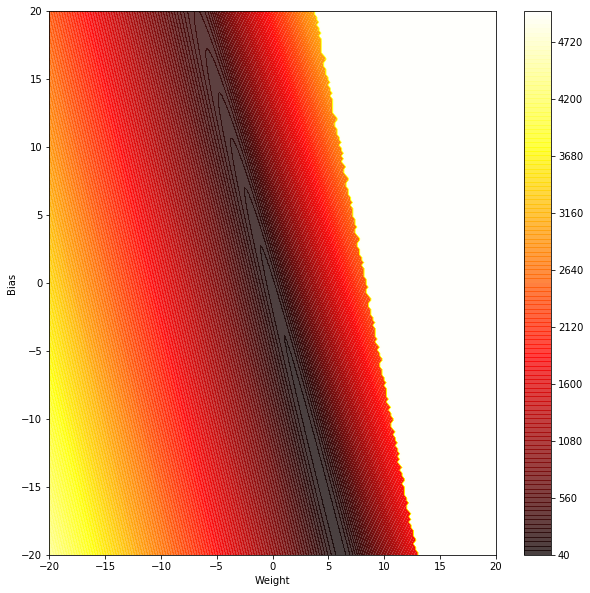

In [143]:
%matplotlib inline
plt.figure(figsize=(10, 10))
C = plt.contourf(X, Y, Z, 150, alpha=.75, cmap=plt.cm.hot, origin='lower')
plt.colorbar(C)
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.show()

#### Par Learning的狀況

註: 以五次訓練取一個值(全取會過度密集)

In [104]:
line = np.array(iris_model.par_log)[::5].T
line2 = np.array(iris_model2.par_log)[::5].T

C:\Users\burt\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


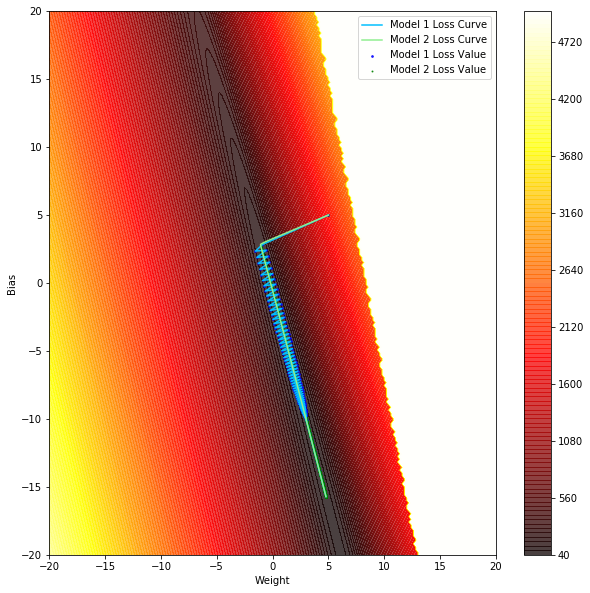

In [151]:
plt.figure(figsize=(10, 10))
C = plt.contourf(X, Y, Z, 150, linewidth=.5, alpha=.75, cmap=plt.cm.hot, origin='lower')
plt.colorbar(C)
# plt.plot(line[1][np.arange(0, 5000)], line[0][np.arange(0, 5000)])
plt.plot(line[1], line[0], color="deepskyblue", alpha=1, label="Model 1 Loss Curve")
plt.scatter(line[1], line[0], color="b", s=3, alpha=.8, label="Model 1 Loss Value")
plt.plot(line2[1], line2[0], color="lightgreen", alpha=1, label="Model 2 Loss Curve")
plt.scatter(line2[1], line2[0], color="g", s=1, alpha=.8, label="Model 2 Loss Value")
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.legend()
plt.show()

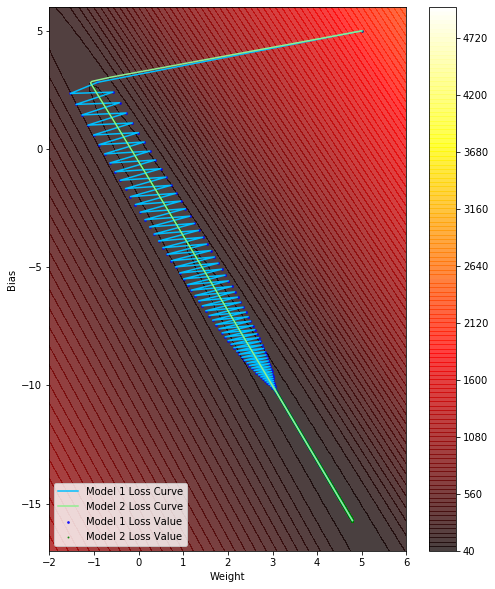

In [150]:
plt.figure(figsize=(8, 10))
C = plt.contourf(X, Y, Z, 150, alpha=.75, cmap=plt.cm.hot, origin='lower')
plt.colorbar(C)
plt.plot(line[1], line[0], color="deepskyblue", alpha=1, label="Model 1 Loss Curve")
plt.scatter(line[1], line[0], color="b", s=3, alpha=.8, label="Model 1 Loss Value")
plt.plot(line2[1], line2[0], color="lightgreen", alpha=1, label="Model 2 Loss Curve")
plt.scatter(line2[1], line2[0], color="g", s=1, alpha=.8, label="Model 2 Loss Value")
plt.xlim(-2, 6)
plt.ylim(-17, 6)
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.legend()
plt.show()